# Review of Experimental Results for Isolated Digits

In [1]:
import numpy as np
import pandas as pd
import math
import joblib
import optuna
import time
from os import path
import matplotlib.pyplot as plt
from ESN import ESN as esn
from sklearn.metrics import f1_score as f1
from sklearn.metrics import roc_auc_score as rocAuc
from sklearn.metrics import accuracy_score
from scipy.interpolate import make_interp_spline

In [478]:
df = pd.read_excel('Architecture.xlsx', engine='openpyxl').iloc[:,0]

 
studies = pd.DataFrame([
    ["study_1469", joblib.load('Digit-experiment-' + str(df[0]) + ".pkl").best_value,  joblib.load('Digit-experiment-' + str(df[0]) + ".pkl").best_trial,  joblib.load('Digit-experiment-' + str(df[0]) + ".pkl").best_trials], 
    ["study_146A", joblib.load('Digit-experiment-' + str(df[1]) + ".pkl").best_value,  joblib.load('Digit-experiment-' + str(df[1]) + ".pkl").best_trial,  joblib.load('Digit-experiment-' + str(df[1]) + ".pkl").best_trials], 
    ["study_146B", joblib.load('Digit-experiment-' + str(df[2]) + ".pkl").best_value,  joblib.load('Digit-experiment-' + str(df[2]) + ".pkl").best_trial,  joblib.load('Digit-experiment-' + str(df[2]) + ".pkl").best_trials], 
    ["study_1479", joblib.load('Digit-experiment-' + str(df[3]) + ".pkl").best_value,  joblib.load('Digit-experiment-' + str(df[3]) + ".pkl").best_trial,  joblib.load('Digit-experiment-' + str(df[3]) + ".pkl").best_trials], 
    ["study_147A", joblib.load('Digit-experiment-' + str(df[4]) + ".pkl").best_value,  joblib.load('Digit-experiment-' + str(df[4]) + ".pkl").best_trial,  joblib.load('Digit-experiment-' + str(df[4]) + ".pkl").best_trials], 
    ["study_147B", joblib.load('Digit-experiment-' + str(df[5]) + ".pkl").best_value,  joblib.load('Digit-experiment-' + str(df[5]) + ".pkl").best_trial,  joblib.load('Digit-experiment-' + str(df[5]) + ".pkl").best_trials], 
    ["study_1569", joblib.load('Digit-experiment-' + str(df[6]) + ".pkl").best_value,  joblib.load('Digit-experiment-' + str(df[6]) + ".pkl").best_trial,  joblib.load('Digit-experiment-' + str(df[6]) + ".pkl").best_trials], 
    ["study_156A", joblib.load('Digit-experiment-' + str(df[7]) + ".pkl").best_value,  joblib.load('Digit-experiment-' + str(df[7]) + ".pkl").best_trial,  joblib.load('Digit-experiment-' + str(df[7]) + ".pkl").best_trials], 
    ["study_156B", joblib.load('Digit-experiment-' + str(df[8]) + ".pkl").best_value,  joblib.load('Digit-experiment-' + str(df[8]) + ".pkl").best_trial,  joblib.load('Digit-experiment-' + str(df[8]) + ".pkl").best_trials], 
    ["study_1579", joblib.load('Digit-experiment-' + str(df[9]) + ".pkl").best_value,  joblib.load('Digit-experiment-' + str(df[9]) + ".pkl").best_trial,  joblib.load('Digit-experiment-' + str(df[9]) + ".pkl").best_trials], 
    ["study_157A", joblib.load('Digit-experiment-' + str(df[10]) + ".pkl").best_value, joblib.load('Digit-experiment-' + str(df[10]) + ".pkl").best_trial, joblib.load('Digit-experiment-' + str(df[10]) + ".pkl").best_trials],
    ["study_157B", joblib.load('Digit-experiment-' + str(df[11]) + ".pkl").best_value, joblib.load('Digit-experiment-' + str(df[11]) + ".pkl").best_trial, joblib.load('Digit-experiment-' + str(df[11]) + ".pkl").best_trials],
    ["study_2469", joblib.load('Digit-experiment-' + str(df[12]) + ".pkl").best_value, joblib.load('Digit-experiment-' + str(df[12]) + ".pkl").best_trial, joblib.load('Digit-experiment-' + str(df[12]) + ".pkl").best_trials],
    ["study_246A", joblib.load('Digit-experiment-' + str(df[13]) + ".pkl").best_value, joblib.load('Digit-experiment-' + str(df[13]) + ".pkl").best_trial, joblib.load('Digit-experiment-' + str(df[13]) + ".pkl").best_trials],
    ["study_246B", joblib.load('Digit-experiment-' + str(df[14]) + ".pkl").best_value, joblib.load('Digit-experiment-' + str(df[14]) + ".pkl").best_trial, joblib.load('Digit-experiment-' + str(df[14]) + ".pkl").best_trials],
    ["study_2479", joblib.load('Digit-experiment-' + str(df[15]) + ".pkl").best_value, joblib.load('Digit-experiment-' + str(df[15]) + ".pkl").best_trial, joblib.load('Digit-experiment-' + str(df[15]) + ".pkl").best_trials],
    ["study_247A", joblib.load('Digit-experiment-' + str(df[16]) + ".pkl").best_value, joblib.load('Digit-experiment-' + str(df[16]) + ".pkl").best_trial, joblib.load('Digit-experiment-' + str(df[16]) + ".pkl").best_trials],
    ["study_247B", joblib.load('Digit-experiment-' + str(df[17]) + ".pkl").best_value, joblib.load('Digit-experiment-' + str(df[17]) + ".pkl").best_trial, joblib.load('Digit-experiment-' + str(df[17]) + ".pkl").best_trials],
    ["study_2569", joblib.load('Digit-experiment-' + str(df[18]) + ".pkl").best_value, joblib.load('Digit-experiment-' + str(df[18]) + ".pkl").best_trial, joblib.load('Digit-experiment-' + str(df[18]) + ".pkl").best_trials],
    ["study_256A", joblib.load('Digit-experiment-' + str(df[19]) + ".pkl").best_value, joblib.load('Digit-experiment-' + str(df[19]) + ".pkl").best_trial, joblib.load('Digit-experiment-' + str(df[19]) + ".pkl").best_trials],
    ["study_256B", joblib.load('Digit-experiment-' + str(df[20]) + ".pkl").best_value, joblib.load('Digit-experiment-' + str(df[20]) + ".pkl").best_trial, joblib.load('Digit-experiment-' + str(df[20]) + ".pkl").best_trials],
    ["study_2579", joblib.load('Digit-experiment-' + str(df[21]) + ".pkl").best_value, joblib.load('Digit-experiment-' + str(df[21]) + ".pkl").best_trial, joblib.load('Digit-experiment-' + str(df[21]) + ".pkl").best_trials],
    ["study_257A", joblib.load('Digit-experiment-' + str(df[22]) + ".pkl").best_value, joblib.load('Digit-experiment-' + str(df[22]) + ".pkl").best_trial, joblib.load('Digit-experiment-' + str(df[22]) + ".pkl").best_trials],
    ["study_257B", joblib.load('Digit-experiment-' + str(df[23]) + ".pkl").best_value, joblib.load('Digit-experiment-' + str(df[23]) + ".pkl").best_trial, joblib.load('Digit-experiment-' + str(df[23]) + ".pkl").best_trials],
    ["study_3469", joblib.load('Digit-experiment-' + str(df[24]) + ".pkl").best_value, joblib.load('Digit-experiment-' + str(df[24]) + ".pkl").best_trial, joblib.load('Digit-experiment-' + str(df[24]) + ".pkl").best_trials],
    ["study_346A", joblib.load('Digit-experiment-' + str(df[25]) + ".pkl").best_value, joblib.load('Digit-experiment-' + str(df[25]) + ".pkl").best_trial, joblib.load('Digit-experiment-' + str(df[25]) + ".pkl").best_trials],
    ["study_346B", joblib.load('Digit-experiment-' + str(df[26]) + ".pkl").best_value, joblib.load('Digit-experiment-' + str(df[26]) + ".pkl").best_trial, joblib.load('Digit-experiment-' + str(df[26]) + ".pkl").best_trials],
    ["study_3479", joblib.load('Digit-experiment-' + str(df[27]) + ".pkl").best_value, joblib.load('Digit-experiment-' + str(df[27]) + ".pkl").best_trial, joblib.load('Digit-experiment-' + str(df[27]) + ".pkl").best_trials],
    ["study_347A", joblib.load('Digit-experiment-' + str(df[28]) + ".pkl").best_value, joblib.load('Digit-experiment-' + str(df[28]) + ".pkl").best_trial, joblib.load('Digit-experiment-' + str(df[28]) + ".pkl").best_trials],
    ["study_347B", joblib.load('Digit-experiment-' + str(df[29]) + ".pkl").best_value, joblib.load('Digit-experiment-' + str(df[29]) + ".pkl").best_trial, joblib.load('Digit-experiment-' + str(df[29]) + ".pkl").best_trials],
    ["study_3569", joblib.load('Digit-experiment-' + str(df[30]) + ".pkl").best_value, joblib.load('Digit-experiment-' + str(df[30]) + ".pkl").best_trial, joblib.load('Digit-experiment-' + str(df[30]) + ".pkl").best_trials],
    ["study_356A", joblib.load('Digit-experiment-' + str(df[31]) + ".pkl").best_value, joblib.load('Digit-experiment-' + str(df[31]) + ".pkl").best_trial, joblib.load('Digit-experiment-' + str(df[31]) + ".pkl").best_trials],
    ["study_356B", joblib.load('Digit-experiment-' + str(df[32]) + ".pkl").best_value, joblib.load('Digit-experiment-' + str(df[32]) + ".pkl").best_trial, joblib.load('Digit-experiment-' + str(df[32]) + ".pkl").best_trials],
    ["study_3579", joblib.load('Digit-experiment-' + str(df[33]) + ".pkl").best_value, joblib.load('Digit-experiment-' + str(df[33]) + ".pkl").best_trial, joblib.load('Digit-experiment-' + str(df[33]) + ".pkl").best_trials],
    ["study_357A", joblib.load('Digit-experiment-' + str(df[34]) + ".pkl").best_value, joblib.load('Digit-experiment-' + str(df[34]) + ".pkl").best_trial, joblib.load('Digit-experiment-' + str(df[34]) + ".pkl").best_trials],
    ["study_357B", joblib.load('Digit-experiment-' + str(df[35]) + ".pkl").best_value, joblib.load('Digit-experiment-' + str(df[35]) + ".pkl").best_trial, joblib.load('Digit-experiment-' + str(df[35]) + ".pkl").best_trials],
    ["study_8469", joblib.load('Digit-experiment-' + str(df[36]) + ".pkl").best_value, joblib.load('Digit-experiment-' + str(df[36]) + ".pkl").best_trial, joblib.load('Digit-experiment-' + str(df[36]) + ".pkl").best_trials],
    ["study_846A", joblib.load('Digit-experiment-' + str(df[37]) + ".pkl").best_value, joblib.load('Digit-experiment-' + str(df[37]) + ".pkl").best_trial, joblib.load('Digit-experiment-' + str(df[37]) + ".pkl").best_trials],
    ["study_846B", joblib.load('Digit-experiment-' + str(df[38]) + ".pkl").best_value, joblib.load('Digit-experiment-' + str(df[38]) + ".pkl").best_trial, joblib.load('Digit-experiment-' + str(df[38]) + ".pkl").best_trials],
    ["study_8479", joblib.load('Digit-experiment-' + str(df[39]) + ".pkl").best_value, joblib.load('Digit-experiment-' + str(df[39]) + ".pkl").best_trial, joblib.load('Digit-experiment-' + str(df[39]) + ".pkl").best_trials],
    ["study_847A", joblib.load('Digit-experiment-' + str(df[40]) + ".pkl").best_value, joblib.load('Digit-experiment-' + str(df[40]) + ".pkl").best_trial, joblib.load('Digit-experiment-' + str(df[40]) + ".pkl").best_trials],
    ["study_847B", joblib.load('Digit-experiment-' + str(df[41]) + ".pkl").best_value, joblib.load('Digit-experiment-' + str(df[41]) + ".pkl").best_trial, joblib.load('Digit-experiment-' + str(df[41]) + ".pkl").best_trials],
    ["study_8569", joblib.load('Digit-experiment-' + str(df[42]) + ".pkl").best_value, joblib.load('Digit-experiment-' + str(df[42]) + ".pkl").best_trial, joblib.load('Digit-experiment-' + str(df[42]) + ".pkl").best_trials],
    ["study_856A", joblib.load('Digit-experiment-' + str(df[43]) + ".pkl").best_value, joblib.load('Digit-experiment-' + str(df[43]) + ".pkl").best_trial, joblib.load('Digit-experiment-' + str(df[43]) + ".pkl").best_trials],
    ["study_856B", joblib.load('Digit-experiment-' + str(df[44]) + ".pkl").best_value, joblib.load('Digit-experiment-' + str(df[44]) + ".pkl").best_trial, joblib.load('Digit-experiment-' + str(df[44]) + ".pkl").best_trials],
    ["study_8579", joblib.load('Digit-experiment-' + str(df[45]) + ".pkl").best_value, joblib.load('Digit-experiment-' + str(df[45]) + ".pkl").best_trial, joblib.load('Digit-experiment-' + str(df[45]) + ".pkl").best_trials],
    ["study_857A", joblib.load('Digit-experiment-' + str(df[46]) + ".pkl").best_value, joblib.load('Digit-experiment-' + str(df[46]) + ".pkl").best_trial, joblib.load('Digit-experiment-' + str(df[46]) + ".pkl").best_trials],
    ["study_857B", joblib.load('Digit-experiment-' + str(df[47]) + ".pkl").best_value, joblib.load('Digit-experiment-' + str(df[47]) + ".pkl").best_trial, joblib.load('Digit-experiment-' + str(df[47]) + ".pkl").best_trials]
])



In [479]:
studies = studies.sort_values(by=1,ascending=False)
studies = studies.reset_index(drop=True)
studies.head(48)

0         1                                                  2  \
0   study_147A  0.913333  FrozenTrial(number=24, values=[0.9133333333333...   
1   study_847A  0.913333  FrozenTrial(number=24, values=[0.9133333333333...   
2   study_347A  0.913333  FrozenTrial(number=24, values=[0.9133333333333...   
3   study_247A  0.913333  FrozenTrial(number=24, values=[0.9133333333333...   
4   study_146A  0.906667  FrozenTrial(number=11, values=[0.9066666666666...   
5   study_846A  0.906667  FrozenTrial(number=11, values=[0.9066666666666...   
6   study_246A  0.906667  FrozenTrial(number=11, values=[0.9066666666666...   
7   study_346A  0.906667  FrozenTrial(number=11, values=[0.9066666666666...   
8   study_3579  0.890000  FrozenTrial(number=44, values=[0.89], datetime...   
9   study_2579  0.890000  FrozenTrial(number=44, values=[0.89], datetime...   
10  study_8579  0.890000  FrozenTrial(number=44, values=[0.89], datetime...   
11  study_1579  0.890000  FrozenTrial(number=44, values=[0.89], datetime...   
12  study_157A  0.870000  FrozenTrial(number=36, values=[0.87], datetime...   
13  study_156A  0.870000  FrozenTrial(number=39, values=[0.87], datetime...   
14  study_356A  0.870000  FrozenTrial(number=39, values=[0.87], datetime...   
15  study_357A  0.870000  FrozenTrial(number=36, values=[0.87], datetime...   
16  study_256A  0.870000  FrozenTrial(number=39, values=[0.87], datetime...   
17  study_857A  0.870000  FrozenTrial(number=36, values=[0.87], datetime...   
18  study_257A  0.870000  FrozenTrial(number=36, values=[0.87], datetime...   
19  study_856A  0.870000  FrozenTrial(number=39, values=[0.87], datetime...   
20  study_156B  0.866667  FrozenTrial(number=21, values=[0.8666666666666...   
21  study_356B  0.866667  FrozenTrial(number=21, values=[0.8666666666666...   
22  study_856B  0.866667  FrozenTrial(number=21, values=[0.8666666666666...   
23  study_256B  0.866667  FrozenTrial(number=21, values=[0.8666666666666...   
24  study_357B  0.860000  FrozenTrial(number=19, values=[0.86], datetime...   
25  study_857B  0.860000  FrozenTrial(number=19, values=[0.86], datetime...   
26  study_257B  0.860000  FrozenTrial(number=19, values=[0.86], datetime...   
27  study_157B  0.860000  FrozenTrial(number=19, values=[0.86], datetime...   
28  study_2569  0.850000  FrozenTrial(number=25, values=[0.85], datetime...   
29  study_3569  0.850000  FrozenTrial(number=25, values=[0.85], datetime...   
30  study_1569  0.850000  FrozenTrial(number=25, values=[0.85], datetime...   
31  study_8569  0.850000  FrozenTrial(number=25, values=[0.85], datetime...   
32  study_346B  0.846667  FrozenTrial(number=46, values=[0.8466666666666...   
33  study_246B  0.846667  FrozenTrial(number=46, values=[0.8466666666666...   
34  study_146B  0.846667  FrozenTrial(number=46, values=[0.8466666666666...   
35  study_846B  0.846667  FrozenTrial(number=46, values=[0.8466666666666...   
36  study_347B  0.843333  FrozenTrial(number=12, values=[0.8433333333333...   
37  study_247B  0.843333  FrozenTrial(number=12, values=[0.8433333333333...   
38  study_147B  0.843333  FrozenTrial(number=12, values=[0.8433333333333...   
39  study_847B  0.843333  FrozenTrial(number=12, values=[0.8433333333333...   
40  study_1469  0.840000  FrozenTrial(number=46, values=[0.84], datetime...   
41  study_8469  0.840000  FrozenTrial(number=46, values=[0.84], datetime...   
42  study_2469  0.840000  FrozenTrial(number=46, values=[0.84], datetime...   
43  study_3469  0.840000  FrozenTrial(number=46, values=[0.84], datetime...   
44  study_8479  0.813333  FrozenTrial(number=8, values=[0.81333333333333...   
45  study_3479  0.813333  FrozenTrial(number=8, values=[0.81333333333333...   
46  study_2479  0.813333  FrozenTrial(number=8, values=[0.81333333333333...   
47  study_1479  0.813333  FrozenTrial(number=8, values=[0.81333333333333...   

                                                    3  
0   [FrozenTrial(number=24, values=[0.913333333333...  
1   [FrozenTrial(number=24, v

## Confirm Trial Results
Make sure the above results can be duplicated

In [503]:
def getScores(actual, predicted): 
    np.seterr(all='raise')
    try:
        f1Score = f1(actual, predicted, average='samples')
        
        aucScore = rocAuc(actual, predicted)
        
        accuracyScore = accuracy_score(actual, predicted)
        
    except FloatingPointError:
        print('Exceptionally bad generation of ESN. Aborting sub-trial. (1)')
        f1Score = -1
        aucScore = -1
        accuracyScore = -1
        
    except ValueError:
        print('Exceptionally bad generation of ESN. Aborting sub-trial. (3)')
        f1Score = -1
        aucScore = -1
        accuracyScore = -1

    np.seterr(all='warn')
    return f1Score, aucScore, accuracyScore

def ttvSplit(data, numClasses):
    np.random.seed(0)
    data = pd.DataFrame(data)
    numFeatures = data.shape[1] - numClasses
    features = pd.DataFrame(data.iloc[:,:numFeatures])
    targets = data.iloc[:,numFeatures:numFeatures+numClasses]

    groups = pd.Series(features.iloc[:,0].unique()).sample(frac=1).reset_index(drop=True)
    ind0 = round(groups.shape[0] * 0.40)
    ind1 = round(groups.shape[0] * 0.2) + ind0

    trainingGroups = groups.iloc[0:ind0]
    testGroups = groups.iloc[ind0:ind1]
    validGroups = groups.iloc[ind1:]

    training = features.loc[features.iloc[:,0].isin(trainingGroups.values)]
    test = features.loc[features.iloc[:,0].isin(testGroups.values)]
    validation = features.loc[features.iloc[:,0].isin(validGroups.values)]

    trainingT = targets.loc[targets.index.isin(training.index)]
    testT = targets.loc[targets.index.isin(test.index)]
    validT = targets.loc[targets.index.isin(validation.index)]

    return training.to_numpy(), trainingT.to_numpy(), test.to_numpy(), testT.to_numpy(), validation.to_numpy(), validT.to_numpy()

#If all the classes are in a single column, this function
#will break up that representation into multiple columns
#for the ESN
def esnClassRep(data, uniqueClasses):
    targets = np.zeros((data.shape[0],uniqueClasses))
    
    for i in range(0, data.shape[0]):
        rowTarget = int(data[i,-1])
        targets[i,rowTarget] = 1
        
    data = data[:,:-1]
    data = np.concatenate((data,targets), axis=1)
    return data

def compressTargets(features, output):
    numTimeSeq = np.unique(features[:,0]).shape[0]    #get number of unique time sequences
    _, groupID = np.unique(features[:,0], return_index=True)
    groupID = features[np.sort(groupID), 0]
    
    indexer = 0
    r = np.zeros((numTimeSeq, output.shape[1]))
    for i in groupID:
        mask = (features[:, 0] == i)         #grab all rows that have groupID i
        r[indexer,:] = (output[mask,:])[0]     #we don't need to average this 
        indexer = indexer + 1
    return r

#### Generate Data

In [504]:
#Generate Data
numClasses = 5
df = pd.read_csv('data.csv')
df = df.loc[df.iloc[:,-1].isin(np.arange(0,numClasses))]
df = df.to_numpy()
df = esnClassRep(df,numClasses)
trainin, trainout, testin, testout, valin, valout = ttvSplit(df, numClasses)
testout = compressTargets(testin, testout)
trainout0 =trainout
trainout = np.tanh(trainout) #The inverse arctanh function is not defined for 1 so transforming the outputs allows use of tanh reservoir activation for training
    #We don't have to undo the transform because the ESN classifier automatically rounds and returns one for the best choice class

In [505]:
trainin.shape

(31360, 86)

In [506]:
trainout.shape

(31360, 5)

In [507]:
testoutCompress = compressTargets(trainin, trainout)
np.sum(testoutCompress, axis=0)

array([91.39129871, 98.24564612, 92.15289287, 90.62970456, 84.53695131])

In [508]:
np.unique(trainout)

array([0.        , 0.76159416])

In [509]:
testin.shape

(15550, 86)

In [510]:
testout.shape

(300, 5)

In [511]:
np.sum(testout, axis=0)

array([54., 60., 56., 67., 63.])

#### Trial vs Recreated

In [512]:
# Parameters (to tune)
#N = trial.suggest_int('N', 10,100) For Jaeger et al's work we know 20 neurons was sufficient and we can always scale up
np.random.seed(0)
K = 85 
L = numClasses
N = 50                     #Text used 200
v = (np.random.uniform(-1,1, trainin.shape[0]))
sv = 0                     #From text
sfb = 0                   #No feedback required
dfb = 0
outAlg = 1 
isBias = True
isClassification = True
washout = 10

for i in range(0,10):
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']

    model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

    seed = studies.iloc[i,2].user_attrs['seed']
    
    np.seterr(all='warn')
    model.generateW(seed)
    model.generateWin(seed)
    model.generateWfb(seed)

    model.train(input_u = trainin, teacher=trainout, washout=washout) #zero start state is default

    predicted = model.run(input_u=testin, time=testin.shape[0], washout=washout)

    f1Score, aucScore, accuracyScore = getScores(testout, predicted)
    print(studies.iloc[i,0])
    print("F1: " + str(studies.iloc[i,2].user_attrs['F1']) + ", " + str(f1Score))
    print("AUC: " + str(studies.iloc[i,2].user_attrs['AUC']) + ", " + str(aucScore))
    print("Accuracy: " + str(studies.iloc[i,2].user_attrs['Accuracy']) + ", " + str(accuracyScore) + "\n")

study_147A
F1: 0.9133333333333333, 0.8966666666666666
AUC: 0.9444816723147506, 0.9338087131748718
Accuracy: 0.9133333333333333, 0.8966666666666666

study_847A
F1: 0.9133333333333333, 0.8966666666666666
AUC: 0.9444816723147506, 0.9338087131748718
Accuracy: 0.9133333333333333, 0.8966666666666666

study_347A
F1: 0.9133333333333333, 0.8966666666666666
AUC: 0.9444816723147506, 0.9338087131748718
Accuracy: 0.9133333333333333, 0.8966666666666666

study_247A
F1: 0.9133333333333333, 0.8966666666666666
AUC: 0.9444816723147506, 0.9338087131748718
Accuracy: 0.9133333333333333, 0.8966666666666666

study_146A
F1: 0.9066666666666666, 0.8733333333333333
AUC: 0.9426696221958177, 0.9215016571365666
Accuracy: 0.9066666666666666, 0.8733333333333333

study_846A
F1: 0.9066666666666666, 0.8733333333333333
AUC: 0.9426696221958177, 0.9215016571365666
Accuracy: 0.9066666666666666, 0.8733333333333333

study_246A
F1: 0.9066666666666666, 0.8733333333333333
AUC: 0.9426696221958177, 0.9215016571365666
Accuracy: 0.90

# How Does Model Accuracy Change as We Increase the Number of Neurons, N?

In [513]:
##### Parameters 
K = 85 
L = numClasses
N = 50                     #Text used 200
v = (np.random.uniform(-1,1, trainin.shape[0]))
sv = 0                     #From text
sfb = 0                   #No feedback required
dfb = 0
outAlg = 1 
isBias = True
isClassification = True
washout = 10

inc = 100
x = np.arange(50,551,inc) #Number of Neurons
y = np.zeros((6,1))
z = np.zeros((6,1))
w = np.zeros((6,1))
n = np.zeros((6,1))
scores = np.zeros((15,2))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo3 = pd.DataFrame()
plotInfo30 = pd.DataFrame()
plotInfo3TimeTrain = pd.DataFrame()
plotInfo3TimePredict = pd.DataFrame()
for i in range(0,studies.shape[0]): #pick a model
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,6):#This is for increasing neurons for a particular model instantiation
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                        L = L,
                        N = N,
                        p = p,
                        a = a,
                        v = v,
                        dw = dw,
                        din = din,
                        dfb = dfb,
                        sin = sin,
                        sfb = sfb,
                        sv = sv,
                        resFunc = resFunc,
                        outFunc = outFunc,
                        outAlg = outAlg,
                        B = B,
                        distribution = distribution,
                        isBias = isBias,
                        isU2Y = isU2Y,
                        isY2Y = isY2Y,
                        isClassification = isClassification)
            np.seterr(all='warn')
            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=testin, time=testin.shape[0], washout=washout)
            end = time.time()
            
            f1Score, aucScore, accuracyScore = getScores(testout, predicted)
            scores[k,0] = f1Score
            scores[k,1] = aucScore
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores[:,0])
        standard_deviation = np.std(scores[:,0])
        distance_from_mean = abs(scores[:,0] - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers_f1 = scores[not_outlier,0]
        no_outliers_auc = scores[not_outlier,1]
        no_outliers_time_train = timesTrain[not_outlier,0]
        no_outliers_time_predict = timesPredict[not_outlier,0]
        
        #average scores together
        f10 = np.mean(no_outliers_f1)
        auc0 = np.mean(no_outliers_auc)
        y[j,0] = f10
        z[j,0] = auc0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        #print(str(N) , str(nrmse0))
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 100 neurons
    plotInfo3 = pd.concat((plotInfo3, pd.DataFrame(y, columns=[studies.iloc[i,0]])), axis=1)
    plotInfo30 = pd.concat((plotInfo30, pd.DataFrame(z, columns=[studies.iloc[i,0]])), axis=1)
    plotInfo3TimeTrain = pd.concat((plotInfo3TimeTrain, pd.DataFrame(w, columns=[studies.iloc[i,0]])), axis=1)
    plotInfo3TimePredict = pd.concat((plotInfo3TimePredict, pd.DataFrame(n, columns=[studies.iloc[i,0]])), axis=1)

In [514]:
#Cleanup the plot
pd.set_option('display.max_columns', None)
plotInfo3.iloc[:,:]

study_147A  study_847A  study_347A  study_247A  study_146A  study_846A  \
0    0.866905    0.866905    0.866905    0.866905    0.885333    0.885333   
1    0.922381    0.922381    0.922381    0.922381    0.932857    0.932857   
2    0.915238    0.915238    0.915238    0.915238    0.939048    0.939048   
3    0.880476    0.880476    0.880476    0.880476    0.925238    0.925238   
4    0.791667    0.791667    0.791667    0.791667    0.862857    0.862857   
5    0.660714    0.660714    0.660714    0.660714    0.749556    0.749556   

   study_246A  study_346A  study_3579  study_2579  study_8579  study_1579  \
0    0.885333    0.885333    0.806190    0.806190    0.806190    0.806190   
1    0.932857    0.932857    0.863077    0.863077    0.863077    0.863077   
2    0.939048    0.939048    0.867111    0.867111    0.867111    0.867111   
3    0.925238    0.925238    0.862222    0.862222    0.862222    0.862222   
4    0.862857    0.862857    0.836444    0.836444    0.836444    0.836444   
5    0.749556    0.749556    0.814762    0.814762    0.814762    0.814762   

   study_157A  study_156A  study_356A  study_357A  study_256A  study_857A  \
0    0.837619    0.810000    0.810000    0.837619    0.810000    0.837619   
1    0.915556    0.866444    0.866444    0.915556    0.866444    0.915556   
2    0.934048    0.860769    0.860769    0.934048    0.860769    0.934048   
3    0.934000    0.796667    0.796667    0.934000    0.796667    0.934000   
4    0.937111    0.710000    0.710000    0.937111    0.710000    0.937111   
5    0.935714    0.642667    0.642667    0.935714    0.642667    0.935714   

   study_257A  study_856A  study_156B  study_356B  study_856B  study_256B  \
0    0.837619    0.810000    0.815111    0.815111    0.815111    0.815111   
1    0.915556    0.866444    0.855111    0.855111    0.855111    0.855111   
2    0.934048    0.860769    0.805476    0.805476    0.805476    0.805476   
3    0.934000    0.796667    0.728444    0.728444    0.728444    0.728444   
4    0.937111    0.710000    0.592857    0.592857    0.592857    0.592857   
5    0.935714    0.642667    0.411429    0.411429    0.411429    0.411429   

   study_357B  study_857B  study_257B  study_157B  study_2569  study_3569  \
0    0.806444    0.806444    0.806444    0.806444    0.791538    0.791538   
1    0.896410    0.896410    0.896410    0.896410    0.835238    0.835238   
2    0.912889    0.912889    0.912889    0.912889    0.799333    0.799333   
3    0.913111    0.913111    0.913111    0.913111    0.727556    0.727556   
4    0.923571    0.923571    0.923571    0.923571    0.593095    0.593095   
5    0.921556    0.921556    0.921556    0.921556    0.459778    0.459778   

   study_1569  study_8569  study_346B  study_246B  study_146B  study_846B  \
0    0.791538    0.791538    0.799286    0.799286    0.799286    0.799286   
1    0.835238    0.835238    0.870000    0.870000    0.870000    0.870000   
2    0.799333    0.799333    0.862821    0.862821    0.862821    0.862821   
3    0.727556    0.727556    0.851111    0.851111    0.851111    0.851111   
4    0.593095    0.593095    0.826429    0.826429    0.826429    0.826429   
5    0.459778    0.459778    0.823810    0.823810    0.823810    0.823810   

   study_347B  study_247B  study_147B  study_847B  study_1469  study_8469  \
0    0.807556    0.807556    0.807556    0.807556    0.802619    0.802619   
1    0.839778    0.839778    0.839778    0.839778    0.846000    0.846000   
2    0.793111    0.793111    0.793111    0.793111    0.815333    0.815333   
3    0.709762    0.709762    0.709762    0.709762    0.728889    0.728889   
4    0.550889    0.550889    0.550889    0.550889    0.594524    0.594524   
5    0.352619    0.352619    0.352619    0.352619    0.457857    0.457857   

   study_2469  study_3469  study_8479  study_3479  study_2479  study_1479  
0    0.802619    0.802619    0.774615    0.774615    0.774615    0.774615  
1    0.846000    0.846000    0.766905    0.766905    0.766905    0.7669

In [515]:
plotInfo3Avg = (plotInfo3.iloc[5,:])-(plotInfo3.iloc[0,:])
plotInfo3Avg = plotInfo3Avg.sort_values(ascending=False)
plotInfo3Avg

study_357B    0.115111
study_857B    0.115111
study_157B    0.115111
study_257B    0.115111
study_157A    0.098095
study_857A    0.098095
study_257A    0.098095
study_357A    0.098095
study_846B    0.024524
study_346B    0.024524
study_146B    0.024524
study_246B    0.024524
study_3579    0.008571
study_2579    0.008571
study_8579    0.008571
study_1579    0.008571
study_146A   -0.135778
study_846A   -0.135778
study_346A   -0.135778
study_246A   -0.135778
study_256A   -0.167333
study_856A   -0.167333
study_156A   -0.167333
study_356A   -0.167333
study_147A   -0.206190
study_847A   -0.206190
study_247A   -0.206190
study_347A   -0.206190
study_2479   -0.326154
study_3479   -0.326154
study_8479   -0.326154
study_1479   -0.326154
study_8569   -0.331761
study_1569   -0.331761
study_3569   -0.331761
study_2569   -0.331761
study_1469   -0.344762
study_8469   -0.344762
study_2469   -0.344762
study_3469   -0.344762
study_356B   -0.403683
study_156B   -0.403683
study_256B   -0.403683
study_856B 

In [516]:
plotInfo3_10 = plotInfo3[['study_357A','study_857B','study_157B','study_257B','study_157A','study_857A', 'study_257A', 'study_357A','study_846B','study_346B','study_146B','study_246B']]

In [517]:
plotInfo3_10.head(10)

study_357A  study_857B  study_157B  study_257B  study_157A  study_857A  \
0    0.837619    0.806444    0.806444    0.806444    0.837619    0.837619   
1    0.915556    0.896410    0.896410    0.896410    0.915556    0.915556   
2    0.934048    0.912889    0.912889    0.912889    0.934048    0.934048   
3    0.934000    0.913111    0.913111    0.913111    0.934000    0.934000   
4    0.937111    0.923571    0.923571    0.923571    0.937111    0.937111   
5    0.935714    0.921556    0.921556    0.921556    0.935714    0.935714   

   study_257A  study_357A  study_846B  study_346B  study_146B  study_246B  
0    0.837619    0.837619    0.799286    0.799286    0.799286    0.799286  
1    0.915556    0.915556    0.870000    0.870000    0.870000    0.870000  
2    0.934048    0.934048    0.862821    0.862821    0.862821    0.862821  
3    0.934000    0.934000    0.851111    0.851111    0.851111    0.851111  
4    0.937111    0.937111    0.826429    0.826429    0.826429    0.826429  
5    0.935714    0.935714    0.823810    0.823810    0.823810    0.823810

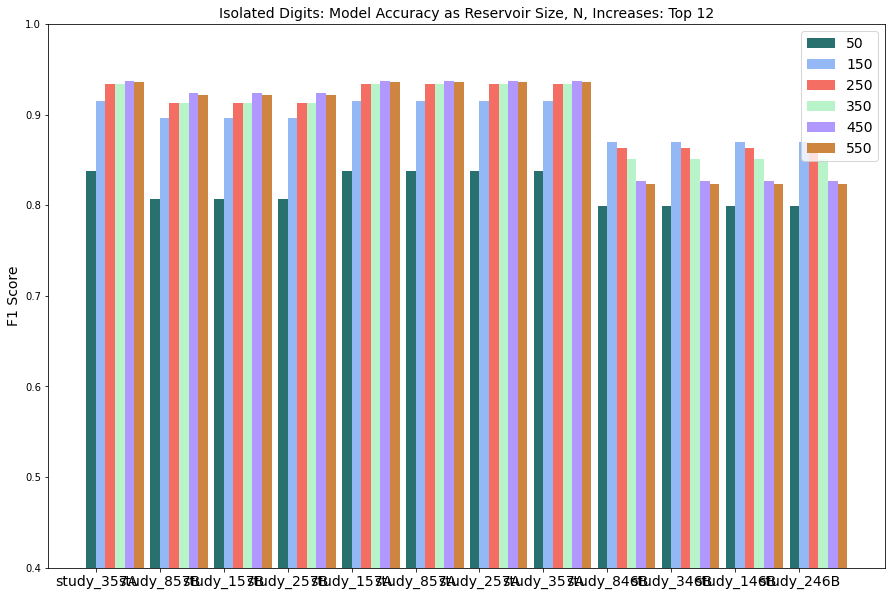

In [518]:
#add to plot
plt.figure(figsize=(15, 10))

N = plotInfo3_10.shape[1]

ind = np.arange(N)
width = 0.15
plt.bar(ind + width*0, plotInfo3_10.iloc[0,:], color = '#28716E', width = width, label='50')
plt.bar(ind + width*1, plotInfo3_10.iloc[1,:], color = '#94B8F5', width = width, label='150')
plt.bar(ind + width*2, plotInfo3_10.iloc[2,:], color = '#F56E63', width = width, label='250')
plt.bar(ind + width*3, plotInfo3_10.iloc[3,:], color = '#B8F3C9', width = width, label='350')
plt.bar(ind + width*4, plotInfo3_10.iloc[4,:], color = '#B098FF', width = width, label='450')
plt.bar(ind + width*5, plotInfo3_10.iloc[5,:], color = '#CD853F', width = width, label='550')

plt.xticks(ind + width / 2, plotInfo3_10.columns, fontsize=14)
plt.legend(loc='best', fontsize=14)
plt.ylim([0.4,1.0])
plt.ylabel('F1 Score', fontsize=14)
plt.title('Isolated Digits: Model Accuracy as Reservoir Size, N, Increases: Top 12', fontsize=14)

plt.show()

In [520]:
orderedStudies = pd.DataFrame()
bestStudies = ['study_357A','study_857B','study_157B','study_257B','study_157A','study_857A', 'study_257A', 'study_357A','study_846B','study_346B','study_146B','study_246B']
for i in bestStudies:
    orderedStudies = pd.concat([orderedStudies, studies.loc[studies.iloc[:,0] == i]])
orderedStudies = orderedStudies.reset_index(drop=True)
orderedStudies

0         1                                                  2  \
0   study_357A  0.870000  FrozenTrial(number=36, values=[0.87], datetime...   
1   study_857B  0.860000  FrozenTrial(number=19, values=[0.86], datetime...   
2   study_157B  0.860000  FrozenTrial(number=19, values=[0.86], datetime...   
3   study_257B  0.860000  FrozenTrial(number=19, values=[0.86], datetime...   
4   study_157A  0.870000  FrozenTrial(number=36, values=[0.87], datetime...   
5   study_857A  0.870000  FrozenTrial(number=36, values=[0.87], datetime...   
6   study_257A  0.870000  FrozenTrial(number=36, values=[0.87], datetime...   
7   study_357A  0.870000  FrozenTrial(number=36, values=[0.87], datetime...   
8   study_846B  0.846667  FrozenTrial(number=46, values=[0.8466666666666...   
9   study_346B  0.846667  FrozenTrial(number=46, values=[0.8466666666666...   
10  study_146B  0.846667  FrozenTrial(number=46, values=[0.8466666666666...   
11  study_246B  0.846667  FrozenTrial(number=46, values=[0.8466666666666...   

                                                    3  
0   [FrozenTrial(number=36, values=[0.87], datetim...  
1   [FrozenTrial(number=19, values=[0.86], datetim...  
2   [FrozenTrial(number=19, values=[0.86], datetim...  
3   [FrozenTrial(number=19, values=[0.86], datetim...  
4   [FrozenTrial(number=36, values=[0.87], datetim...  
5   [FrozenTrial(number=36, values=[0.87], datetim...  
6   [FrozenTrial(number=36, values=[0.87], datetim...  
7   [FrozenTrial(number=36, values=[0.87], datetim...  
8   [FrozenTrial(number=46, values=[0.846666666666...  
9   [FrozenTrial(number=46, values=[0.846666666666...  
10  [FrozenTrial(number=46, values=[0.846666666666...  
11  [FrozenTrial(number=46, values=[0.846666666666...

In [521]:
# Parameters (to tune)
#N = trial.suggest_int('N', 10,100) For Jaeger et al's work we know 20 neurons was sufficient and we can always scale up
%time
np.random.seed(0)
K = 85 
L = numClasses
N = 50                     #Text used 200
v = (np.random.uniform(-1,1, trainin.shape[0]))
sv = 0                     #From text
sfb = 0                   #No feedback required
dfb = 0
outAlg = 1 
isBias = True
isClassification = True
washout = 10

inc = 200
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((6,1))
z = np.zeros((6,1))
w = np.zeros((6,1))
n = np.zeros((6,1))
scores = np.zeros((15,2))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo23 = pd.DataFrame()
plotInfo230 = pd.DataFrame()
plotInfo23TimeTrain = pd.DataFrame()
plotInfo23TimePredict = pd.DataFrame()
for i in range(0,orderedStudies.shape[0]): #pick a model
    print(orderedStudies.iloc[i,0])
    N = 50
    p = orderedStudies.iloc[i,2].params['p']
    a = orderedStudies.iloc[i,2].params['a']
    dw = orderedStudies.iloc[i,2].params['dw']
    din = orderedStudies.iloc[i,2].params['din']
    sin = orderedStudies.iloc[i,2].params['sin']
    B = orderedStudies.iloc[i,2].params['B']
    isU2Y = orderedStudies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = orderedStudies.iloc[i,2].user_attrs['isY2Y']
    resFunc = orderedStudies.iloc[i,2].user_attrs['resFunc']
    outFunc = orderedStudies.iloc[i,2].user_attrs['outFunc']
    distribution = orderedStudies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,6):#This is for increasing neurons for a particular model instantiation
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                        L = L,
                        N = N,
                        p = p,
                        a = a,
                        v = v,
                        dw = dw,
                        din = din,
                        dfb = dfb,
                        sin = sin,
                        sfb = sfb,
                        sv = sv,
                        resFunc = resFunc,
                        outFunc = outFunc,
                        outAlg = outAlg,
                        B = B,
                        distribution = distribution,
                        isBias = isBias,
                        isU2Y = isU2Y,
                        isY2Y = isY2Y,
                        isClassification = isClassification)
            np.seterr(all='warn')
            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=testin, time=testin.shape[0], washout=washout)
            end = time.time()
            
            f1Score, aucScore, accuracyScore = getScores(testout, predicted)
            scores[k,0] = f1Score
            scores[k,1] = aucScore
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores[:,0])
        standard_deviation = np.std(scores[:,0])
        distance_from_mean = abs(scores[:,0] - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers_f1 = scores[not_outlier,0]
        no_outliers_auc = scores[not_outlier,1]
        no_outliers_time_train = timesTrain[not_outlier,0]
        no_outliers_time_predict = timesPredict[not_outlier,0]
        
        #average scores together
        f10 = np.mean(no_outliers_f1)
        auc0 = np.mean(no_outliers_auc)
        y[j,0] = f10
        z[j,0] = auc0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        #print(str(N) , str(nrmse0))
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 100 neurons
    plotInfo23 = pd.concat((plotInfo23, pd.DataFrame(y, columns=[orderedStudies.iloc[i,0]])), axis=1)
    plotInfo230 = pd.concat((plotInfo230, pd.DataFrame(z, columns=[orderedStudies.iloc[i,0]])), axis=1)
    plotInfo23TimeTrain = pd.concat((plotInfo23TimeTrain, pd.DataFrame(w, columns=[orderedStudies.iloc[i,0]])), axis=1)
    plotInfo23TimePredict = pd.concat((plotInfo23TimePredict, pd.DataFrame(n, columns=[orderedStudies.iloc[i,0]])), axis=1)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 4.77 µs
study_357A
study_857B
study_157B
study_257B
study_157A
study_857A
study_257A
study_357A
study_846B
study_346B
study_146B
study_246B


In [522]:
plotInfo23_10 = plotInfo23[['study_357A','study_857B','study_157B','study_257B','study_157A','study_857A', 'study_257A', 'study_357A','study_846B','study_346B','study_146B','study_246B']]

In [523]:
plotInfo23_10

study_357A  study_357A  study_857B  study_157B  study_257B  study_157A  \
0    0.837619    0.837619    0.806444    0.806444    0.806444    0.837619   
1    0.934048    0.934048    0.912889    0.912889    0.912889    0.934048   
2    0.937111    0.937111    0.923571    0.923571    0.923571    0.937111   
3    0.930476    0.930476    0.919111    0.919111    0.919111    0.930476   
4    0.929048    0.929048    0.907556    0.907556    0.907556    0.929048   
5    0.930000    0.930000    0.903571    0.903571    0.903571    0.930000   

   study_857A  study_257A  study_357A  study_357A  study_846B  study_346B  \
0    0.837619    0.837619    0.837619    0.837619    0.799286    0.799286   
1    0.934048    0.934048    0.934048    0.934048    0.862821    0.862821   
2    0.937111    0.937111    0.937111    0.937111    0.826429    0.826429   
3    0.930476    0.930476    0.930476    0.930476    0.816429    0.816429   
4    0.929048    0.929048    0.929048    0.929048    0.796905    0.796905   
5    0.930000    0.930000    0.930000    0.930000    0.795333    0.795333   

   study_146B  study_246B  
0    0.799286    0.799286  
1    0.862821    0.862821  
2    0.826429    0.826429  
3    0.816429    0.816429  
4    0.796905    0.796905  
5    0.795333    0.795333

# Time Complexity

In [524]:
plotInfo23TimeTrain

study_357A  study_857B  study_157B  study_257B  study_157A  study_857A  \
0    2.940574    2.519138    2.795748    2.988679    2.919306    3.003279   
1    3.636061    3.692792    3.956278    4.035439    4.275025    4.367073   
2    4.030259    4.404089    4.657631    4.870300    5.269348    5.275607   
3    4.790612    5.247181    5.617194    5.850601    6.354316    6.258332   
4    5.980259    6.330456    6.633660    6.999344    7.664007    9.295379   
5    8.684552    8.052667    8.590241    9.576619   10.027025   10.947598   

   study_257A  study_357A  study_846B  study_346B  study_146B  study_246B  
0    3.151472    3.051969    2.883341    2.990551    2.948904    2.967752  
1    4.572585    4.371856    3.998823    4.187222    3.966615    4.053053  
2    5.540461    5.441908    4.953294    5.777369    4.985379    5.024915  
3    6.473773    6.450161    6.224858    5.949850    5.989690    6.014636  
4    7.735968    7.696343    7.935696    7.653909    7.043322    7.110431  
5    9.935239   10.109574   11.682722    8.925810    9.084054    8.991180

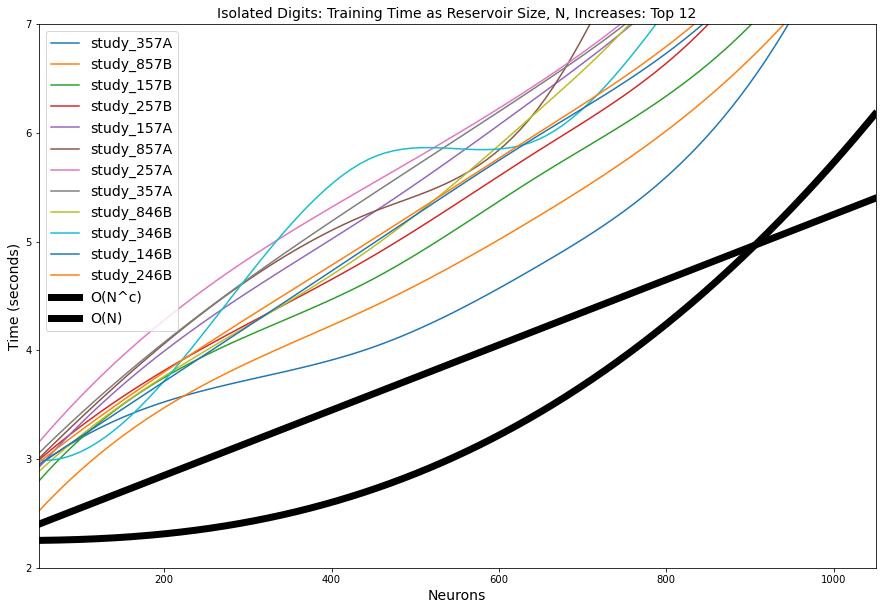

In [529]:
#add to plot
plt.figure(figsize=(15, 10))
for col in range(0,plotInfo23TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo23TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo23TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.00000011*np.power(n,2.5)+2.25
#nlogn = 0.0001*n*np.log(n)
orderOfN = (0.003*n)+2.25
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)
#plt.plot(n,nlogn,label='O(Nlog(N))', color='#808080', linewidth=7)

plt.legend(fontsize=14)
plt.xlim([50,1050])
plt.ylim([2,7])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('Isolated Digits: Training Time as Reservoir Size, N, Increases: Top 12', fontsize=14)
plt.show()

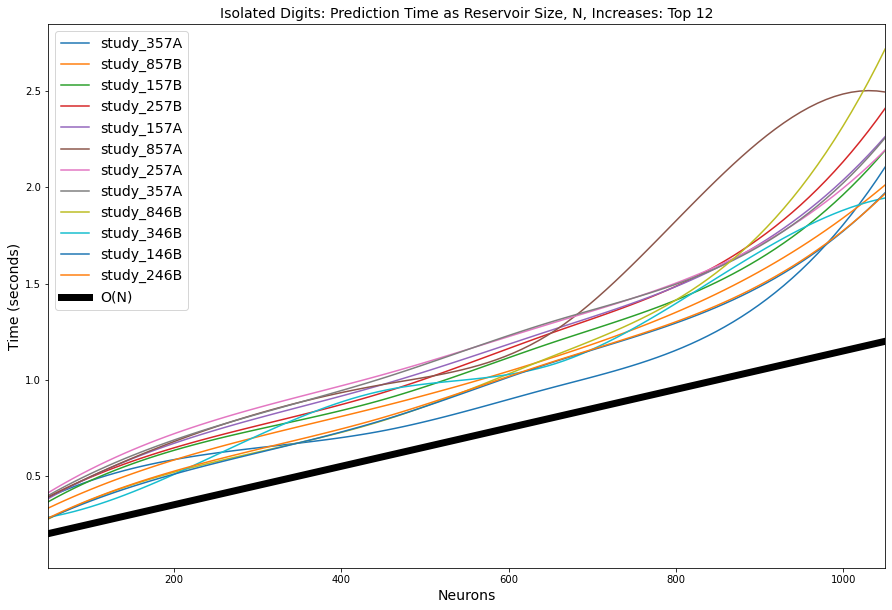

In [530]:
#add to plot
from scipy.special import factorial
plt.figure(figsize=(15, 10))
for col in range(0,plotInfo23TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo23TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo23TimePredict.columns[col])
    
n = np.arange(1,1050)
orderOfN = (0.001*n)+0.15
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)
#plt.plot(n,nToN,label='O(N^N)', color='blue', linewidth=7)

plt.legend(fontsize=14)
plt.xlim([50,1050])
#plt.ylim([0,0.5])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('Isolated Digits: Prediction Time as Reservoir Size, N, Increases: Top 12', fontsize=14)
plt.show()

In [527]:
plotInfo23

study_357A  study_857B  study_157B  study_257B  study_157A  study_857A  \
0    0.837619    0.806444    0.806444    0.806444    0.837619    0.837619   
1    0.934048    0.912889    0.912889    0.912889    0.934048    0.934048   
2    0.937111    0.923571    0.923571    0.923571    0.937111    0.937111   
3    0.930476    0.919111    0.919111    0.919111    0.930476    0.930476   
4    0.929048    0.907556    0.907556    0.907556    0.929048    0.929048   
5    0.930000    0.903571    0.903571    0.903571    0.930000    0.930000   

   study_257A  study_357A  study_846B  study_346B  study_146B  study_246B  
0    0.837619    0.837619    0.799286    0.799286    0.799286    0.799286  
1    0.934048    0.934048    0.862821    0.862821    0.862821    0.862821  
2    0.937111    0.937111    0.826429    0.826429    0.826429    0.826429  
3    0.930476    0.930476    0.816429    0.816429    0.816429    0.816429  
4    0.929048    0.929048    0.796905    0.796905    0.796905    0.796905  
5    0.930000    0.930000    0.795333    0.795333    0.795333    0.795333

In [528]:
for i in range(0,7):
    print(orderedStudies.iloc[i,0])
    print(orderedStudies.iloc[i,2].params)
    print("\n")

study_357A
{'p': 0.6242803243797946, 'a': 0.6728248684442766, 'dw': 0.3554430992778711, 'din': 0.16636777752514276, 'sin': 1.0513293975047375, 'B': 0.0012102234339456837}


study_857B
{'p': 0.9744194180614792, 'a': 0.8207101956880367, 'dw': 0.1891857052793444, 'din': 0.6575588716977981, 'sin': 1.2012302656698566, 'B': 0.024787130181875193}


study_157B
{'p': 0.9744194180614792, 'a': 0.8207101956880367, 'dw': 0.1891857052793444, 'din': 0.6575588716977981, 'sin': 1.2012302656698566, 'B': 0.024787130181875193}


study_257B
{'p': 0.9744194180614792, 'a': 0.8207101956880367, 'dw': 0.1891857052793444, 'din': 0.6575588716977981, 'sin': 1.2012302656698566, 'B': 0.024787130181875193}


study_157A
{'p': 0.6242803243797946, 'a': 0.6728248684442766, 'dw': 0.3554430992778711, 'din': 0.16636777752514276, 'sin': 1.0513293975047375, 'B': 0.0012102234339456837}


study_857A
{'p': 0.6242803243797946, 'a': 0.6728248684442766, 'dw': 0.3554430992778711, 'din': 0.16636777752514276, 'sin': 1.0513293975047375

# Which reservoir activation function is the best?

## Models that scored very similar, but used different activation function

In [21]:
np.random.seed(0)
# Parameters 
K = 85 
L = numClasses
N = 50                     #Text used 200
v = (np.random.uniform(-1,1, trainin.shape[0]))
sv = 0                     #From text
sfb = 0                   #No feedback required
dfb = 0
outAlg = 1 
isBias = True
isClassification = True
washout = 10

inc = 200
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((6,1))       #Holds scores for different neuron sizes
w = np.zeros((6,1))
n = np.zeros((6,1))
scores = np.zeros((15,2))  #Holds scores for multiple evaluations of single neuron size
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo0 = pd.DataFrame()
plotInfo0TimeTrain = pd.DataFrame()
plotInfo0TimePredict = pd.DataFrame()
for c in range(0,2): #Select models for evaluation
    i = 0
    if c == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_346B'].index[0]
    elif c == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_356B'].index[0]
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,6):#This is for increasing neurons for a particular model instantiation
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)
            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=testin, time=testin.shape[0], washout=washout)
            end = time.time()
            
            f1Score, aucScore, accuracyScore = getScores(testout, predicted)
            scores[k,0] = f1Score
            scores[k,1] = aucScore
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores[:,0])
        standard_deviation = np.std(scores[:,0])
        distance_from_mean = abs(scores[:,0] - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers_f1 = scores[not_outlier,0]
        no_outliers_auc = scores[not_outlier,1]
        no_outliers_time_train = timesTrain[not_outlier,0]
        no_outliers_time_predict = timesPredict[not_outlier,0]
        
        #average scores together
        f10 = np.mean(no_outliers_f1)
        auc0 = np.mean(no_outliers_auc)
        y[j,0] = f10
        z[j,0] = auc0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        #print(str(N) , str(nrmse0))
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo0 = pd.concat((plotInfo0, pd.DataFrame(y, columns=[studies.iloc[i,0]])), axis=1)
    plotInfo0TimeTrain = pd.concat((plotInfo0TimeTrain, pd.DataFrame(w, columns=[studies.iloc[i,0]])), axis=1)
    plotInfo0TimePredict = pd.concat((plotInfo0TimePredict, pd.DataFrame(n, columns=[studies.iloc[i,0]])), axis=1)

In [22]:
plotInfo0

study_346B  study_356B
0    0.799286    0.815111
1    0.862821    0.805476
2    0.826429    0.592857
3    0.816429    0.366667
4    0.796905    0.435333
5    0.795333    0.466667

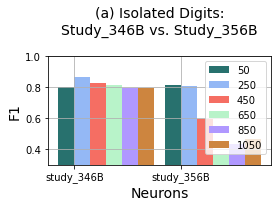

In [315]:
#add to plot
plt.figure(figsize=(4, 2))

N = plotInfo0.shape[1]

ind = np.arange(N)
width = 0.15
plt.bar(ind + width*0, plotInfo0.iloc[0,:], color = '#28716E', width = width, label='50')
plt.bar(ind + width*1, plotInfo0.iloc[1,:], color = '#94B8F5', width = width, label='250')
plt.bar(ind + width*2, plotInfo0.iloc[2,:], color = '#F56E63', width = width, label='450')
plt.bar(ind + width*3, plotInfo0.iloc[3,:], color = '#B8F3C9', width = width, label='650')
plt.bar(ind + width*4, plotInfo0.iloc[4,:], color = '#B098FF', width = width, label='850')
plt.bar(ind + width*5, plotInfo0.iloc[5,:], color = '#CD853F', width = width, label='1050')

plt.xticks(ind + width / 2, plotInfo0.columns)
plt.legend(loc='best', fontsize=12)
plt.ylim([0.3,1.0])
plt.legend()
plt.title('(a) Isolated Digits:\nStudy_346B vs. Study_356B\n', fontsize=14)
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('F1', fontsize=14)
plt.grid()
plt.show()

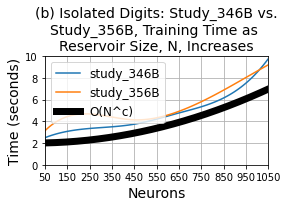

In [179]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo0TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo0TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo0TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.0000045*np.power(n,2)+2
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,10])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(b) Isolated Digits: Study_346B vs.\nStudy_356B, Training Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

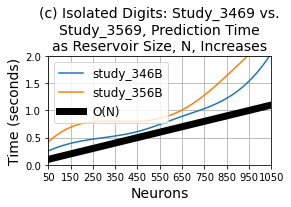

In [180]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo0TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo0TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo0TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.001*n)+0.05
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(c) Isolated Digits: Study_3469 vs.\nStudy_3569, Prediction Time\nas Reservoir Size, N, Increases', fontsize=14)
plt.show()

## Same exact model with different activation function

In [26]:
np.random.seed(0)
# Parameters 
K = 85 
L = numClasses
N = 50                     #Text used 200
v = (np.random.uniform(-1,1, trainin.shape[0]))
sv = 0                     #From text
sfb = 0                   #No feedback required
dfb = 0
outAlg = 1 
isBias = True
isClassification = True
washout = 10

inc = 200
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((6,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,2))  #Holds scores for multiple evaluations of single neuron size
plotInfo1 = pd.DataFrame()
count = 1

#This is all for getting training and prediction times
w = np.zeros((6,1))
n = np.zeros((6,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo1TimeTrain = pd.DataFrame()
plotInfo1TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_346B'].index[0]
while(count < 3): #Select models for evaluation
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = count
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,6):#This is for increasing neurons for a particular model instantiation
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=testin, time=testin.shape[0], washout=washout)
            end = time.time()
            
            f1Score, aucScore, accuracyScore = getScores(testout, predicted)
            scores[k,0] = f1Score
            scores[k,1] = aucScore
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores[:,0])
        standard_deviation = np.std(scores[:,0])
        distance_from_mean = abs(scores[:,0] - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers_f1 = scores[not_outlier,0]
        no_outliers_auc = scores[not_outlier,1]
        no_outliers_time_train = timesTrain[not_outlier,0]
        no_outliers_time_predict = timesPredict[not_outlier,0]
        
        #average scores together
        f10 = np.mean(no_outliers_f1)
        auc0 = np.mean(no_outliers_auc)
        y[j,0] = f10
        z[j,0] = auc0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        #print(str(N) , str(nrmse0))
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo1 = pd.concat((plotInfo1, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo1TimeTrain = pd.concat((plotInfo1TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo1TimePredict = pd.concat((plotInfo1TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

In [27]:
plotInfo1 = plotInfo1.rename(columns={"1": "study_346B", "2": "study_356B"})
plotInfo1TimeTrain = plotInfo1TimeTrain.rename(columns={"1": "study_346B", "2": "study_356B"})
plotInfo1TimePredict = plotInfo1TimePredict.rename(columns={"1": "study_346B", "2": "study_356B"})

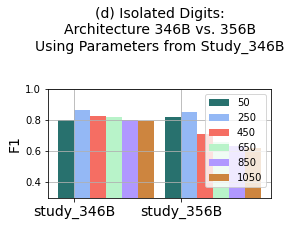

In [316]:
#add to plot
plt.figure(figsize=(4, 2))

N = plotInfo1.shape[1]

ind = np.arange(N)
width = 0.15
plt.bar(ind + width*0, plotInfo1.iloc[0,:], color = '#28716E', width = width, label='50')
plt.bar(ind + width*1, plotInfo1.iloc[1,:], color = '#94B8F5', width = width, label='250')
plt.bar(ind + width*2, plotInfo1.iloc[2,:], color = '#F56E63', width = width, label='450')
plt.bar(ind + width*3, plotInfo1.iloc[3,:], color = '#B8F3C9', width = width, label='650')
plt.bar(ind + width*4, plotInfo1.iloc[4,:], color = '#B098FF', width = width, label='850')
plt.bar(ind + width*5, plotInfo1.iloc[5,:], color = '#CD853F', width = width, label='1050')

plt.xticks(ind + width / 2, plotInfo1.columns, fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.ylim([0.30,1.0])
plt.legend()

plt.ylabel('F1', fontsize=14)
plt.title('(d) Isolated Digits:\nArchitecture 346B vs. 356B\nUsing Parameters from Study_346B\n\n', fontsize=14)
plt.grid()
plt.show()

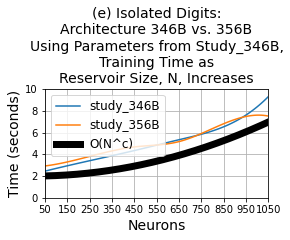

In [128]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo1TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo1TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo1TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.0000045*np.power(n,2)+2
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,10])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(e) Isolated Digits:\nArchitecture 346B vs. 356B\nUsing Parameters from Study_346B,\nTraining Time as\nReservoir Size, N, Increases', fontsize=14)
plt.show()

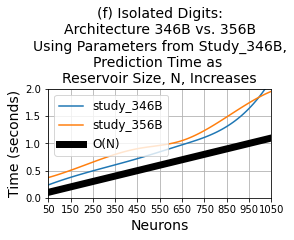

In [133]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo1TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo1TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo1TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.001*n)+0.05
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(f) Isolated Digits:\nArchitecture 346B vs. 356B\nUsing Parameters from Study_346B,\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

In [32]:
np.random.seed(0)
# Parameters 
K = 85 
L = numClasses
N = 50                     #Text used 200
v = (np.random.uniform(-1,1, trainin.shape[0]))
sv = 0                     #From text
sfb = 0                   #No feedback required
dfb = 0
outAlg = 1 
isBias = True
isClassification = True
washout = 10

inc = 200
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((6,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,2))  #Holds scores for multiple evaluations of single neuron size
plotInfo2 = pd.DataFrame()
count = 1

#This is all for getting training and prediction times
w = np.zeros((6,1))
n = np.zeros((6,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo2TimeTrain = pd.DataFrame()
plotInfo2TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_356B'].index[0]
while(count < 3): #Select models for evaluation
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = count
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,6):#This is for increasing neurons for a particular model instantiation
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=testin, time=testin.shape[0], washout=washout)
            end = time.time()
            
            f1Score, aucScore, accuracyScore = getScores(testout, predicted)
            scores[k,0] = f1Score
            scores[k,1] = aucScore
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores[:,0])
        standard_deviation = np.std(scores[:,0])
        distance_from_mean = abs(scores[:,0] - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers_f1 = scores[not_outlier,0]
        no_outliers_auc = scores[not_outlier,1]
        no_outliers_time_train = timesTrain[not_outlier,0]
        no_outliers_time_predict = timesPredict[not_outlier,0]
        
        #average scores together
        f10 = np.mean(no_outliers_f1)
        auc0 = np.mean(no_outliers_auc)
        y[j,0] = f10
        z[j,0] = auc0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo2 = pd.concat((plotInfo2, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo2TimeTrain = pd.concat((plotInfo2TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo2TimePredict = pd.concat((plotInfo2TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

In [33]:
plotInfo2 = plotInfo2.rename(columns={"1": "study_346B", "2": "study_356B"})
plotInfo2TimeTrain = plotInfo2TimeTrain.rename(columns={"1": "study_346B", "2": "study_356B"})
plotInfo2TimePredict = plotInfo2TimePredict.rename(columns={"1": "study_346B", "2": "study_356B"})

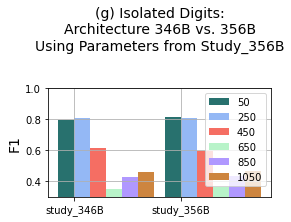

In [321]:
#add to plot
plt.figure(figsize=(4, 2))

N = plotInfo2.shape[1]

ind = np.arange(N)
width = 0.15
plt.bar(ind + width*0, plotInfo2.iloc[0,:], color = '#28716E', width = width, label='50')
plt.bar(ind + width*1, plotInfo2.iloc[1,:], color = '#94B8F5', width = width, label='250')
plt.bar(ind + width*2, plotInfo2.iloc[2,:], color = '#F56E63', width = width, label='450')
plt.bar(ind + width*3, plotInfo2.iloc[3,:], color = '#B8F3C9', width = width, label='650')
plt.bar(ind + width*4, plotInfo2.iloc[4,:], color = '#B098FF', width = width, label='850')
plt.bar(ind + width*5, plotInfo2.iloc[5,:], color = '#CD853F', width = width, label='1050')

plt.xticks(ind + width / 2, plotInfo2.columns)
plt.legend(loc=1, fontsize=10)
plt.ylim([0.30,1.0])
plt.grid()
plt.ylabel('F1', fontsize=14)
plt.title('(g) Isolated Digits:\nArchitecture 346B vs. 356B\nUsing Parameters from Study_356B\n\n', fontsize=14)
plt.show()

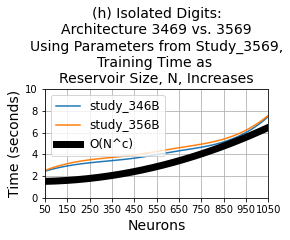

In [137]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo2TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo2TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo2TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.0000045*np.power(n,2)+1.5
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.ylim([0,10])
plt.xlim([50,1050])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(h) Isolated Digits:\nArchitecture 3469 vs. 3569\nUsing Parameters from Study_3569,\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

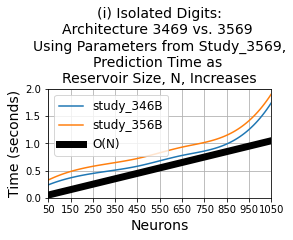

In [138]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo2TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo2TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo2TimePredict.columns[col])
    
n = np.arange(1,1050)
orderOfN = (0.001*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(i) Isolated Digits:\nArchitecture 3469 vs. 3569 \nUsing Parameters from Study_3569,\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

# Is there an overwhelming difference in how the distribution type changes the model?

## How did the parameters vary between the models with different distributions?

In [37]:
print(studies.loc[studies.iloc[:,0] == 'study_1469'].iloc[0,0])
studies.loc[studies.iloc[:,0] == 'study_1469'].iloc[0,2].params

study_1469


{'p': 0.753315834256288,
 'a': 0.9983167152401562,
 'dw': 0.2076707542742859,
 'din': 0.929302434857668,
 'sin': 1.994717419388038,
 'B': 1.462720282880276e-09}

In [38]:
print(studies.loc[studies.iloc[:,0] == 'study_146A'].iloc[0,0])
studies.loc[studies.iloc[:,0] == 'study_146A'].iloc[0,2].params

study_146A


{'p': 0.9762706639640821,
 'a': 0.34111923935187144,
 'dw': 0.17367462289797747,
 'din': 0.10341211345338297,
 'sin': 1.991041510833329,
 'B': 1.5081880553084166e-09}

In [39]:
print(studies.loc[studies.iloc[:,0] == 'study_146B'].iloc[0,0])
studies.loc[studies.iloc[:,0] == 'study_146B'].iloc[0,2].params

study_146B


{'p': 0.7787086183169154,
 'a': 0.44265289145307124,
 'dw': 0.3942027192437702,
 'din': 0.5156115961398271,
 'sin': 1.991759910435517,
 'B': 0.00021100971883311072}

#### Plotted each Model w/ Different Parameters/Distribution

In [40]:
np.random.seed(0)
# Parameters 
K = 85 
L = numClasses
N = 50                     #Text used 200
v = (np.random.uniform(-1,1, trainin.shape[0]))
sv = 0                     #From text
sfb = 0                   #No feedback required
dfb = 0
outAlg = 1 
isBias = True
isClassification = True
washout = 10

inc = 200
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((6,1))       #Holds scores for different neuron sizes
z = np.zeros((6,1))
w = np.zeros((6,1))
scores = np.zeros((15,2))  #Holds scores for multiple evaluations of single neuron size
plotInfo4 = pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((6,1))
n = np.zeros((6,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo4TimeTrain = pd.DataFrame()
plotInfo4TimePredict = pd.DataFrame()

while(count < 3): #Select models for evaluation
    #Select a model
    i = 0
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_1469'].index[0]
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_146A'].index[0]
    elif count == 2:
        i = studies.loc[studies.iloc[:,0] == 'study_146B'].index[0]
    
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,6):#This is for increasing neurons for a particular model instantiation
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=testin, time=testin.shape[0], washout=washout)
            end = time.time()
            
            f1Score, aucScore, accuracyScore = getScores(testout, predicted)
            scores[k,0] = f1Score
            scores[k,1] = aucScore
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores[:,0])
        standard_deviation = np.std(scores[:,0])
        distance_from_mean = abs(scores[:,0] - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers_f1 = scores[not_outlier,0]
        no_outliers_auc = scores[not_outlier,1]
        no_outliers_time_train = timesTrain[not_outlier,0]
        no_outliers_time_predict = timesPredict[not_outlier,0]
        
        #average scores together
        f10 = np.mean(no_outliers_f1)
        auc0 = np.mean(no_outliers_auc)
        y[j,0] = f10
        z[j,0] = auc0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        #print(str(N) , str(nrmse0))
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo4 = pd.concat((plotInfo4, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo4TimeTrain = pd.concat((plotInfo4TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo4TimePredict = pd.concat((plotInfo4TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

In [41]:
plotInfo4 = plotInfo4.rename(columns={"0": "study_1469", "1": "study_146A", "2": "study_146B"})
plotInfo4TimeTrain = plotInfo4TimeTrain.rename(columns={"0": "study_1469", "1": "study_146A", "2": "study_146B"})
plotInfo4TimePredict = plotInfo4TimePredict.rename(columns={"0": "study_1469", "1": "study_146A", "2": "study_146B"})

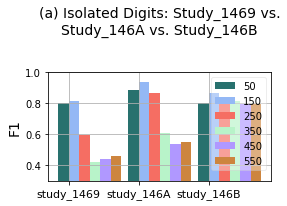

In [458]:
#add to plot
plt.figure(figsize=(4, 2))

N = plotInfo4.shape[1]

ind = np.arange(N)
width = 0.15
plt.bar(ind + width*0, plotInfo4.iloc[0,:], color = '#28716E', width = width, label='50')
plt.bar(ind + width*1, plotInfo4.iloc[1,:], color = '#94B8F5', width = width, label='150')
plt.bar(ind + width*2, plotInfo4.iloc[2,:], color = '#F56E63', width = width, label='250')
plt.bar(ind + width*3, plotInfo4.iloc[3,:], color = '#B8F3C9', width = width, label='350')
plt.bar(ind + width*4, plotInfo4.iloc[4,:], color = '#B098FF', width = width, label='450')
plt.bar(ind + width*5, plotInfo4.iloc[5,:], color = '#CD853F', width = width, label='550')

plt.xticks(ind + width / 2, plotInfo4.columns, fontsize=11)
plt.legend(loc='best', fancybox=True, framealpha=0.35, fontsize=10)
plt.ylim([0.30,1.0])
plt.grid()
plt.ylabel('F1', fontsize=14)
plt.title('(a) Isolated Digits: Study_1469 vs.\nStudy_146A vs. Study_146B\n\n', fontsize=14)
plt.show()

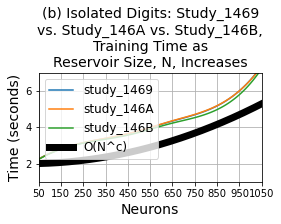

In [156]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo4TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo4TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo4TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.000003*np.power(n,2)+2
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([1,7])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(b) Isolated Digits: Study_1469\nvs. Study_146A vs. Study_146B,\nTraining Time as\nReservoir Size, N, Increases', fontsize=14)
plt.show()

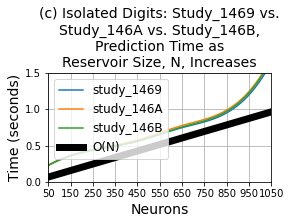

In [159]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo4TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo4TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo4TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0009*n)+0.02
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,1.5])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(c) Isolated Digits: Study_1469 vs.\nStudy_146A vs. Study_146B,\nPrediction Time as\nReservoir Size, N, Increases', fontsize=14)
plt.show()

### Using the same set of parameters, does varying the distribution impair the model's ability to perform?

#### Using Parameter's of study_1469 optimized model

In [45]:
np.random.seed(0)
# Parameters 
K = 85 
L = numClasses
N = 50                     #Text used 200
v = (np.random.uniform(-1,1, trainin.shape[0]))
sv = 0                     #From text
sfb = 0                   #No feedback required
dfb = 0
outAlg = 1 
isBias = True
isClassification = True
washout = 10

inc = 200
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((6,1))       #Holds scores for different neuron sizes
w = np.zeros((6,1))
z = np.zeros((6,1))
n = np.zeros((6,1))
scores = np.zeros((15,2))  #Holds scores for multiple evaluations of single neuron size
plotInfo5 = pd.DataFrame()
count = 0

#This is all for getting training and prediction times
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo5TimeTrain = pd.DataFrame()
plotInfo5TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_1469'].index[0]
while(count < 3): #Select models for evaluation
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    #Select a distribution
    distribution = count
    
    for j in range(0,6):#This is for increasing neurons for a particular model instantiation
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=testin, time=testin.shape[0], washout=washout)
            end = time.time()
            
            f1Score, aucScore, accuracyScore = getScores(testout, predicted)
            scores[k,0] = f1Score
            scores[k,1] = aucScore
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores[:,0])
        standard_deviation = np.std(scores[:,0])
        distance_from_mean = abs(scores[:,0] - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers_f1 = scores[not_outlier,0]
        no_outliers_auc = scores[not_outlier,1]
        no_outliers_time_train = timesTrain[not_outlier,0]
        no_outliers_time_predict = timesPredict[not_outlier,0]
        
        #average scores together
        f10 = np.mean(no_outliers_f1)
        auc0 = np.mean(no_outliers_auc)
        y[j,0] = f10
        z[j,0] = auc0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo5 = pd.concat((plotInfo5, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo5TimeTrain = pd.concat((plotInfo5TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo5TimePredict = pd.concat((plotInfo5TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

In [46]:
plotInfo5 = plotInfo5.rename(columns={"0": "study_1469", "1": "study_146A", "2": "study_146B"})
plotInfo5TimeTrain = plotInfo5TimeTrain.rename(columns={"0": "study_1469", "1": "study_146A", "2": "study_146B"})
plotInfo5TimePredict = plotInfo5TimePredict.rename(columns={"0": "study_1469", "1": "study_146A", "2": "study_146B"})

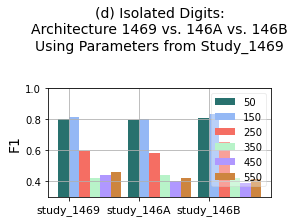

In [459]:
#add to plot
plt.figure(figsize=(4, 2))

N = plotInfo5.shape[1]

ind = np.arange(N)
width = 0.15
plt.bar(ind + width*0, plotInfo5.iloc[0,:], color = '#28716E', width = width, label='50')
plt.bar(ind + width*1, plotInfo5.iloc[1,:], color = '#94B8F5', width = width, label='150')
plt.bar(ind + width*2, plotInfo5.iloc[2,:], color = '#F56E63', width = width, label='250')
plt.bar(ind + width*3, plotInfo5.iloc[3,:], color = '#B8F3C9', width = width, label='350')
plt.bar(ind + width*4, plotInfo5.iloc[4,:], color = '#B098FF', width = width, label='450')
plt.bar(ind + width*5, plotInfo5.iloc[5,:], color = '#CD853F', width = width, label='550')

plt.xticks(ind + width / 2, plotInfo5.columns, fontsize=11)
plt.legend(loc='best', fancybox=True, framealpha=0.35, fontsize=10)
plt.ylim([0.30,1.0])
plt.grid()
plt.ylabel('F1', fontsize=14)
plt.title('(d) Isolated Digits:\nArchitecture 1469 vs. 146A vs. 146B\nUsing Parameters from Study_1469\n\n', fontsize=14)
plt.show()

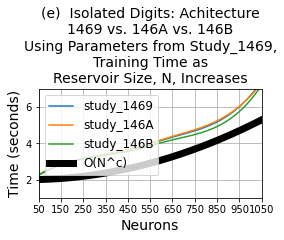

In [164]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo5TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo5TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo5TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.000003*np.power(n,2)+2
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([1,7])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(e)  Isolated Digits: Achitecture\n1469 vs. 146A vs. 146B\nUsing Parameters from Study_1469,\nTraining Time as\nReservoir Size, N, Increases', fontsize=14)
plt.show()

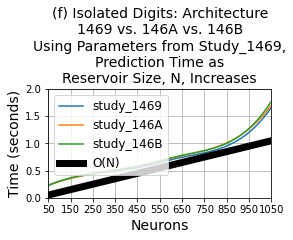

In [165]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo5TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo5TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo5TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.001*n)+0.0
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,2])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(f) Isolated Digits: Architecture\n1469 vs. 146A vs. 146B\nUsing Parameters from Study_1469,\nPrediction Time as\nReservoir Size, N, Increases', fontsize=14)
plt.show()

#### Using Parameter's of study_146A optimized model

In [50]:
np.random.seed(0)
# Parameters 
K = 85 
L = numClasses
N = 50                     #Text used 200
v = (np.random.uniform(-1,1, trainin.shape[0]))
sv = 0                     #From text
sfb = 0                   #No feedback required
dfb = 0
outAlg = 1 
isBias = True
isClassification = True
washout = 10

inc = 200
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((6,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,2))  #Holds scores for multiple evaluations of single neuron size
plotInfo6 = pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((6,1))
n = np.zeros((6,1))
n = np.zeros((6,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo6TimeTrain = pd.DataFrame()
plotInfo6TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_146A'].index[0]
while(count < 3): #Select models for evaluation
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    #Select a distribution
    distribution = count
    
    for j in range(0,6):#This is for increasing neurons for a particular model instantiation
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=testin, time=testin.shape[0], washout=washout)
            end = time.time()
            
            f1Score, aucScore, accuracyScore = getScores(testout, predicted)
            scores[k,0] = f1Score
            scores[k,1] = aucScore
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores[:,0])
        standard_deviation = np.std(scores[:,0])
        distance_from_mean = abs(scores[:,0] - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers_f1 = scores[not_outlier,0]
        no_outliers_auc = scores[not_outlier,1]
        no_outliers_time_train = timesTrain[not_outlier,0]
        no_outliers_time_predict = timesPredict[not_outlier,0]
        
        #average scores together
        f10 = np.mean(no_outliers_f1)
        auc0 = np.mean(no_outliers_auc)
        y[j,0] = f10
        z[j,0] = auc0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo6 = pd.concat((plotInfo6, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo6TimeTrain = pd.concat((plotInfo6TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo6TimePredict = pd.concat((plotInfo6TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

In [51]:
plotInfo6 = plotInfo6.rename(columns={"0": "study_1469", "1": "study_146A", "2": "study_146B"})
plotInfo6TimeTrain = plotInfo6TimeTrain.rename(columns={"0": "study_1469", "1": "study_146A", "2": "study_146B"})
plotInfo6TimePredict = plotInfo6TimePredict.rename(columns={"0": "study_1469", "1": "study_146A", "2": "study_146B"})

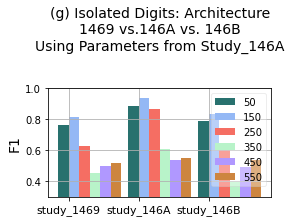

In [461]:
#add to plot
plt.figure(figsize=(4, 2))

N = plotInfo6.shape[1]

ind = np.arange(N)
width = 0.15
plt.bar(ind + width*0, plotInfo6.iloc[0,:], color = '#28716E', width = width, label='50')
plt.bar(ind + width*1, plotInfo6.iloc[1,:], color = '#94B8F5', width = width, label='150')
plt.bar(ind + width*2, plotInfo6.iloc[2,:], color = '#F56E63', width = width, label='250')
plt.bar(ind + width*3, plotInfo6.iloc[3,:], color = '#B8F3C9', width = width, label='350')
plt.bar(ind + width*4, plotInfo6.iloc[4,:], color = '#B098FF', width = width, label='450')
plt.bar(ind + width*5, plotInfo6.iloc[5,:], color = '#CD853F', width = width, label='550')

plt.xticks(ind + width / 2, plotInfo6.columns, fontsize=11)
plt.legend(loc='best', fancybox=True, framealpha=0.35, fontsize=10)
plt.ylim([0.30,1.0])
plt.grid()
plt.ylabel('F1', fontsize=14)
plt.title('(g) Isolated Digits: Architecture\n1469 vs.146A vs. 146B\nUsing Parameters from Study_146A\n\n', fontsize=14)
plt.show()

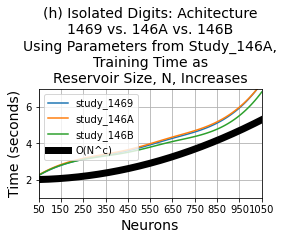

In [167]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo6TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo6TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo6TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.000003*np.power(n,2)+2
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([1,7])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(h) Isolated Digits: Achitecture\n1469 vs. 146A vs. 146B\nUsing Parameters from Study_146A,\nTraining Time as\nReservoir Size, N, Increases', fontsize=14)
plt.show()

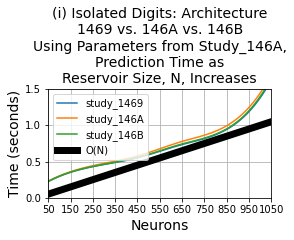

In [169]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo6TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo6TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo6TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.001*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,1.5])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(i) Isolated Digits: Architecture\n1469 vs. 146A vs. 146B\nUsing Parameters from Study_146A,\nPrediction Time as\nReservoir Size, N, Increases', fontsize=14)
plt.show()

#### Using Parameter's of study_146B optimized model

In [55]:
np.random.seed(0)
# Parameters 
K = 85 
L = numClasses
N = 50                     #Text used 200
v = (np.random.uniform(-1,1, trainin.shape[0]))
sv = 0                     #From text
sfb = 0                   #No feedback required
dfb = 0
outAlg = 1 
isBias = True
isClassification = True
washout = 10

z = np.zeros((6,1))
inc = 200
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((6,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,2))  #Holds scores for multiple evaluations of single neuron size
plotInfo7 = pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((6,1))
n = np.zeros((6,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo7TimeTrain = pd.DataFrame()
plotInfo7TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_146B'].index[0]
while(count < 3): #Select models for evaluation
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    #Select a distribution
    distribution = count
    
    for j in range(0,6):#This is for increasing neurons for a particular model instantiation
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=testin, time=testin.shape[0], washout=washout)
            end = time.time()
            
            f1Score, aucScore, accuracyScore = getScores(testout, predicted)
            scores[k,0] = f1Score
            scores[k,1] = aucScore
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores[:,0])
        standard_deviation = np.std(scores[:,0])
        distance_from_mean = abs(scores[:,0] - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers_f1 = scores[not_outlier,0]
        no_outliers_auc = scores[not_outlier,1]
        no_outliers_time_train = timesTrain[not_outlier,0]
        no_outliers_time_predict = timesPredict[not_outlier,0]
        
        #average scores together
        f10 = np.mean(no_outliers_f1)
        auc0 = np.mean(no_outliers_auc)
        y[j,0] = f10
        z[j,0] = auc0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo7 = pd.concat((plotInfo7, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo7TimeTrain = pd.concat((plotInfo7TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo7TimePredict = pd.concat((plotInfo7TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

In [56]:
plotInfo7 = plotInfo7.rename(columns={"0": "study_1469", "1": "study_146A", "2": "study_146B"})
plotInfo7TimeTrain = plotInfo7TimeTrain.rename(columns={"0": "study_1469", "1": "study_146A", "2": "study_146B"})
plotInfo7TimePredict = plotInfo7TimePredict.rename(columns={"0": "study_1469", "1": "study_146A", "2": "study_146B"})

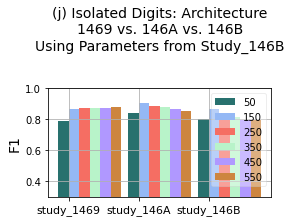

In [462]:
#add to plot
plt.figure(figsize=(4, 2))

N = plotInfo7.shape[1]

ind = np.arange(N)
width = 0.15
plt.bar(ind + width*0, plotInfo7.iloc[0,:], color = '#28716E', width = width, label='50')
plt.bar(ind + width*1, plotInfo7.iloc[1,:], color = '#94B8F5', width = width, label='150')
plt.bar(ind + width*2, plotInfo7.iloc[2,:], color = '#F56E63', width = width, label='250')
plt.bar(ind + width*3, plotInfo7.iloc[3,:], color = '#B8F3C9', width = width, label='350')
plt.bar(ind + width*4, plotInfo7.iloc[4,:], color = '#B098FF', width = width, label='450')
plt.bar(ind + width*5, plotInfo7.iloc[5,:], color = '#CD853F', width = width, label='550')

plt.xticks(ind + width / 2, plotInfo7.columns, fontsize=11)
plt.legend(loc='best', fancybox=True, framealpha=0.35, fontsize=10)
plt.ylim([0.30,1.0])
plt.grid()
plt.ylabel('F1', fontsize=14)
plt.title('(j) Isolated Digits: Architecture\n1469 vs. 146A vs. 146B\nUsing Parameters from Study_146B\n\n', fontsize=14)
plt.show()

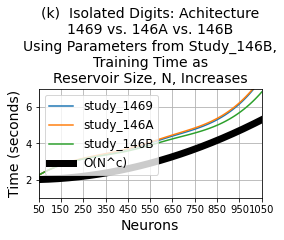

In [175]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo7TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo7TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo7TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.000003*np.power(n,2)+2
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([1,7])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(k)  Isolated Digits: Achitecture\n1469 vs. 146A vs. 146B\nUsing Parameters from Study_146B,\nTraining Time as\nReservoir Size, N, Increases', fontsize=14)
plt.show()

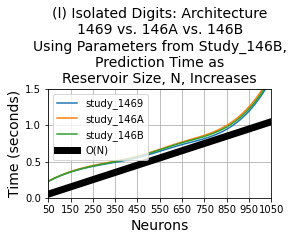

In [177]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo7TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo7TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo7TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.001*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend()
plt.xlim([50,1050])
plt.ylim([0,1.5])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(l) Isolated Digits: Architecture\n1469 vs. 146A vs. 146B\nUsing Parameters from Study_146B,\nPrediction Time as\nReservoir Size, N, Increases', fontsize=14)
plt.show()

# Which connections within the reservoir give the best setup for this pattern generation task?

## How did the parameters vary between the models with different connections?

In [474]:
print(studies.loc[studies.iloc[:,0] == 'study_146B'].iloc[0,0])
studies.loc[studies.iloc[:,0] == 'study_146B'].iloc[0,2].params

study_146B


{'p': 0.7787086183169154,
 'a': 0.44265289145307124,
 'dw': 0.3942027192437702,
 'din': 0.5156115961398271,
 'sin': 1.991759910435517,
 'B': 0.00021100971883311072}

In [475]:
print(studies.loc[studies.iloc[:,0] == 'study_246B'].iloc[0,0])
studies.loc[studies.iloc[:,0] == 'study_246B'].iloc[0,2].params

study_246B


{'p': 0.7787086183169154,
 'a': 0.44265289145307124,
 'dw': 0.3942027192437702,
 'din': 0.5156115961398271,
 'sin': 1.991759910435517,
 'B': 0.00021100971883311072}

In [62]:
print(studies.loc[studies.iloc[:,0] == 'study_346B'].iloc[0,0])
studies.loc[studies.iloc[:,0] == 'study_346B'].iloc[0,2].params

study_346B


{'p': 0.7787086183169154,
 'a': 0.44265289145307124,
 'dw': 0.3942027192437702,
 'din': 0.5156115961398271,
 'sin': 1.991759910435517,
 'B': 0.00021100971883311072}

In [63]:
print(studies.loc[studies.iloc[:,0] == 'study_846B'].iloc[0,0])
studies.loc[studies.iloc[:,0] == 'study_846B'].iloc[0,2].params

study_846B


{'p': 0.7787086183169154,
 'a': 0.44265289145307124,
 'dw': 0.3942027192437702,
 'din': 0.5156115961398271,
 'sin': 1.991759910435517,
 'B': 0.00021100971883311072}

#### Plotted each Model w/ Different Parameters/Connections

In [64]:
np.random.seed(0)
# Parameters 
K = 85 
L = numClasses
N = 50                     #Text used 200
v = (np.random.uniform(-1,1, trainin.shape[0]))
sv = 0                     #From text
sfb = 0                   #No feedback required
dfb = 0
outAlg = 1 
isBias = True
isClassification = True
washout = 10

z = np.zeros((6,1))
inc = 200
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((6,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,2))  #Holds scores for multiple evaluations of single neuron size
plotInfo8= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((6,1))
n = np.zeros((6,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo8TimeTrain = pd.DataFrame()
plotInfo8TimePredict = pd.DataFrame()

while(count < 4): #Select models for evaluation
    #Select a model
    i = 0
    #uConn = False
    #yConn = False
    if count == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_146B'].index[0]
        #uConn = True
    elif count == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_246B'].index[0]
    elif count == 2:
        i = studies.loc[studies.iloc[:,0] == 'study_346B'].index[0]
        #uConn = True
        #yConn = True
    elif count == 3:
        i = studies.loc[studies.iloc[:,0] == 'study_846B'].index[0]
        #yConn = True
    
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,6):#This is for increasing neurons for a particular model instantiation
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=testin, time=testin.shape[0], washout=washout)
            end = time.time()
            
            f1Score, aucScore, accuracyScore = getScores(testout, predicted)
            scores[k,0] = f1Score
            scores[k,1] = aucScore
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores[:,0])
        standard_deviation = np.std(scores[:,0])
        distance_from_mean = abs(scores[:,0] - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers_f1 = scores[not_outlier,0]
        no_outliers_auc = scores[not_outlier,1]
        no_outliers_time_train = timesTrain[not_outlier,0]
        no_outliers_time_predict = timesPredict[not_outlier,0]
        
        #average scores together
        f10 = np.mean(no_outliers_f1)
        auc0 = np.mean(no_outliers_auc)
        y[j,0] = f10
        z[j,0] = auc0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo8 = pd.concat((plotInfo8, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo8TimeTrain = pd.concat((plotInfo8TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo8TimePredict = pd.concat((plotInfo8TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

In [65]:
plotInfo8 = plotInfo8.rename(columns={"0": "study_146B", "1": "study_246B", "2": "study_346B", "3": "study_846B"})
plotInfo8TimeTrain = plotInfo8TimeTrain.rename(columns={"0": "study_146B", "1": "study_246B", "2": "study_346B", "3": "study_846B"})
plotInfo8TimePredict = plotInfo8TimePredict.rename(columns={"0": "study_146B", "1": "study_246B", "2": "study_346B", "3": "study_846B"})

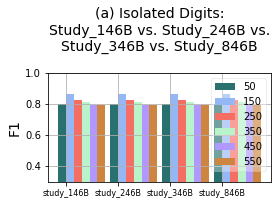

In [188]:
#add to plot
plt.figure(figsize=(4, 2))

N = plotInfo8.shape[1]

ind = np.arange(N)
width = 0.15
plt.bar(ind + width*0, plotInfo8.iloc[0,:], color = '#28716E', width = width, label='50')
plt.bar(ind + width*1, plotInfo8.iloc[1,:], color = '#94B8F5', width = width, label='150')
plt.bar(ind + width*2, plotInfo8.iloc[2,:], color = '#F56E63', width = width, label='250')
plt.bar(ind + width*3, plotInfo8.iloc[3,:], color = '#B8F3C9', width = width, label='350')
plt.bar(ind + width*4, plotInfo8.iloc[4,:], color = '#B098FF', width = width, label='450')
plt.bar(ind + width*5, plotInfo8.iloc[5,:], color = '#CD853F', width = width, label='550')

plt.xticks(ind + width / 2, plotInfo8.columns, fontsize=8)
plt.legend(loc='best', fontsize=10, fancybox=True, framealpha=0.35)
plt.ylim([0.30,1.0])
plt.grid()
plt.ylabel('F1', fontsize=14)
plt.title('(a) Isolated Digits:\nStudy_146B vs. Study_246B vs.\nStudy_346B vs. Study_846B\n', fontsize=14)
plt.show()

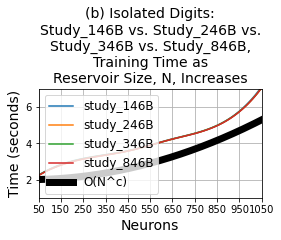

In [197]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo8TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo8TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo8TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.000003*np.power(n,2)+2
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12,loc=2)
plt.xlim([50,1050])
plt.ylim([1,7])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(b) Isolated Digits:\nStudy_146B vs. Study_246B vs.\nStudy_346B vs. Study_846B,\nTraining Time as\nReservoir Size, N, Increases', fontsize=14)
plt.show()

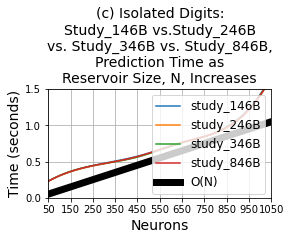

In [201]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo8TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo8TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo8TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.001*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,1.5])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(c) Isolated Digits:\nStudy_146B vs.Study_246B\nvs. Study_346B vs. Study_846B,\nPrediction Time as\nReservoir Size, N, Increases', fontsize=14)
plt.show()

### Using the same set of parameters, does varying the connection impair the model's ability to perform?

In [69]:
np.random.seed(0)
# Parameters 
K = 85 
L = numClasses
N = 50                     #Text used 200
v = (np.random.uniform(-1,1, trainin.shape[0]))
sv = 0                     #From text
sfb = 0                   #No feedback required
dfb = 0
outAlg = 1 
isBias = True
isClassification = True
washout = 10

z = np.zeros((6,1))
inc = 200
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((6,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,2))  #Holds scores for multiple evaluations of single neuron size
plotInfo9= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((6,1))
n = np.zeros((6,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo9TimeTrain = pd.DataFrame()
plotInfo9TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_146B'].index[0]
while(count < 4): #Select models for evaluation
    #Select a model
    uConn = False
    yConn = False
    if count == 0:
        uConn = True
    elif count == 2:
        uConn = True
        yConn = True
    elif count == 3:
        yConn = True
    
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    B = studies.iloc[i,2].params['B']
    isU2Y = uConn
    isY2Y = yConn
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,6):#This is for increasing neurons for a particular model instantiation
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=testin, time=testin.shape[0], washout=washout)
            end = time.time()
            
            f1Score, aucScore, accuracyScore = getScores(testout, predicted)
            scores[k,0] = f1Score
            scores[k,1] = aucScore
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores[:,0])
        standard_deviation = np.std(scores[:,0])
        distance_from_mean = abs(scores[:,0] - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers_f1 = scores[not_outlier,0]
        no_outliers_auc = scores[not_outlier,1]
        no_outliers_time_train = timesTrain[not_outlier,0]
        no_outliers_time_predict = timesPredict[not_outlier,0]
        
        #average scores together
        f10 = np.mean(no_outliers_f1)
        auc0 = np.mean(no_outliers_auc)
        y[j,0] = f10
        z[j,0] = auc0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo9 = pd.concat((plotInfo9, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo9TimeTrain = pd.concat((plotInfo9TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo9TimePredict = pd.concat((plotInfo9TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

In [70]:
plotInfo9 = plotInfo9.rename(columns={"0": "study_146B", "1": "study_246B", "2": "study_346B", "3": "study_846B"})
plotInfo9TimeTrain = plotInfo9TimeTrain.rename(columns={"0": "study_146B", "1": "study_246B", "2": "study_346B", "3": "study_846B"})
plotInfo9TimePredict = plotInfo9TimePredict.rename(columns={"0": "study_146B", "1": "study_246B", "2": "study_346B", "3": "study_846B"})

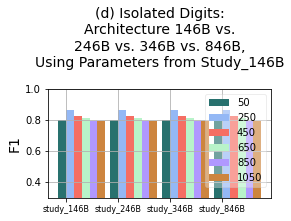

In [210]:
#add to plot
plt.figure(figsize=(4, 2))

N = plotInfo9.shape[1]

ind = np.arange(N)
width = 0.15
plt.bar(ind + width*0, plotInfo9.iloc[0,:], color = '#28716E', width = width, label='50')
plt.bar(ind + width*1, plotInfo9.iloc[1,:], color = '#94B8F5', width = width, label='250')
plt.bar(ind + width*2, plotInfo9.iloc[2,:], color = '#F56E63', width = width, label='450')
plt.bar(ind + width*3, plotInfo9.iloc[3,:], color = '#B8F3C9', width = width, label='650')
plt.bar(ind + width*4, plotInfo9.iloc[4,:], color = '#B098FF', width = width, label='850')
plt.bar(ind + width*5, plotInfo9.iloc[5,:], color = '#CD853F', width = width, label='1050')

plt.xticks(ind + width / 2, plotInfo9.columns, fontsize=8)
plt.legend(loc='best', fancybox=True, framealpha=0.35)
plt.ylim([0.30,1.0])
plt.grid()
plt.ylabel('F1', fontsize=14)
plt.title('(d) Isolated Digits:\nArchitecture 146B vs.\n246B vs. 346B vs. 846B,\nUsing Parameters from Study_146B\n', fontsize=14)
plt.show()

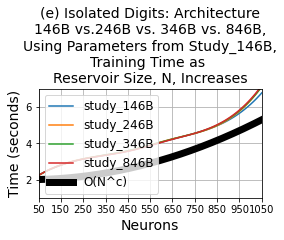

In [231]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo9TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo9TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo9TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.000003*np.power(n,2)+2
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12, loc=2)
plt.xlim([50,1050])
plt.ylim([1,7])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(e) Isolated Digits: Architecture\n146B vs.246B vs. 346B vs. 846B,\nUsing Parameters from Study_146B,\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

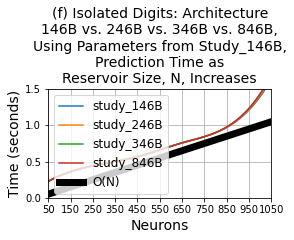

In [230]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo9TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo9TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo9TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.001*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12, loc=2)
plt.xlim([50,1050])
plt.ylim([0,1.5])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(f) Isolated Digits: Architecture\n146B vs. 246B vs. 346B vs. 846B,\nUsing Parameters from Study_146B,\nPrediction Time as\nReservoir Size, N, Increases',fontsize=14)
plt.show()

In [74]:
np.random.seed(0)
# Parameters 
K = 85 
L = numClasses
N = 50                     #Text used 200
v = (np.random.uniform(-1,1, trainin.shape[0]))
sv = 0                     #From text
sfb = 0                   #No feedback required
dfb = 0
outAlg = 1 
isBias = True
isClassification = True
washout = 10

z = np.zeros((6,1))
inc = 200
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((6,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,2))  #Holds scores for multiple evaluations of single neuron size
plotInfo10= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((6,1))
n = np.zeros((6,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo10TimeTrain = pd.DataFrame()
plotInfo10TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_246B'].index[0]
while(count < 4): #Select models for evaluation
    #Select a model
    uConn = False
    yConn = False
    if count == 0:
        uConn = True
    elif count == 2:
        uConn = True
        yConn = True
    elif count == 3:
        yConn = True
    
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    B = studies.iloc[i,2].params['B']
    isU2Y = uConn
    isY2Y = yConn
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,6):#This is for increasing neurons for a particular model instantiation
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=testin, time=testin.shape[0], washout=washout)
            end = time.time()
            
            f1Score, aucScore, accuracyScore = getScores(testout, predicted)
            scores[k,0] = f1Score
            scores[k,1] = aucScore
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores[:,0])
        standard_deviation = np.std(scores[:,0])
        distance_from_mean = abs(scores[:,0] - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers_f1 = scores[not_outlier,0]
        no_outliers_auc = scores[not_outlier,1]
        no_outliers_time_train = timesTrain[not_outlier,0]
        no_outliers_time_predict = timesPredict[not_outlier,0]
        
        #average scores together
        f10 = np.mean(no_outliers_f1)
        auc0 = np.mean(no_outliers_auc)
        y[j,0] = f10
        z[j,0] = auc0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo10 = pd.concat((plotInfo10, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo10TimeTrain = pd.concat((plotInfo10TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo10TimePredict = pd.concat((plotInfo10TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

In [75]:
plotInfo10 = plotInfo10.rename(columns={"0": "study_146B", "1": "study_246B", "2": "study_346B", "3": "study_846B"})
plotInfo10TimeTrain = plotInfo10TimeTrain.rename(columns={"0": "study_146B", "1": "study_246B", "2": "study_346B", "3": "study_846B"})
plotInfo10TimePredict = plotInfo10TimePredict.rename(columns={"0": "study_146B", "1": "study_246B", "2": "study_346B", "3": "study_846B"})

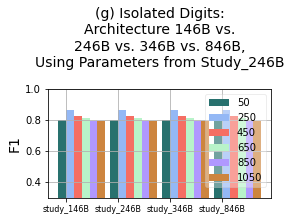

In [215]:
#add to plot
plt.figure(figsize=(4, 2))

N = plotInfo10.shape[1]

ind = np.arange(N)
width = 0.15
plt.bar(ind + width*0, plotInfo10.iloc[0,:], color = '#28716E', width = width, label='50')
plt.bar(ind + width*1, plotInfo10.iloc[1,:], color = '#94B8F5', width = width, label='250')
plt.bar(ind + width*2, plotInfo10.iloc[2,:], color = '#F56E63', width = width, label='450')
plt.bar(ind + width*3, plotInfo10.iloc[3,:], color = '#B8F3C9', width = width, label='650')
plt.bar(ind + width*4, plotInfo10.iloc[4,:], color = '#B098FF', width = width, label='850')
plt.bar(ind + width*5, plotInfo10.iloc[5,:], color = '#CD853F', width = width, label='1050')

plt.xticks(ind + width / 2, plotInfo10.columns, fontsize=8)
plt.legend(loc='best', fancybox=True, framealpha=0.35)
plt.ylim([0.30,1.0])
plt.grid()
plt.ylabel('F1', fontsize=14)
plt.title('(g) Isolated Digits:\nArchitecture 146B vs.\n246B vs. 346B vs. 846B,\nUsing Parameters from Study_246B\n', fontsize=14)
plt.show()

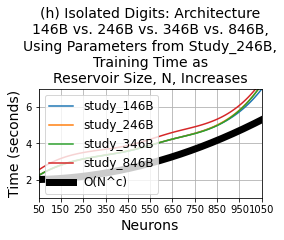

In [224]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo10TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo10TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo10TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.000003*np.power(n,2)+2
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12, loc=2)
plt.xlim([50,1050])
plt.ylim([1,7])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(h) Isolated Digits: Architecture\n146B vs. 246B vs. 346B vs. 846B,\nUsing Parameters from Study_246B,\nTraining Time as\nReservoir Size, N, Increases', fontsize=14)
plt.show()

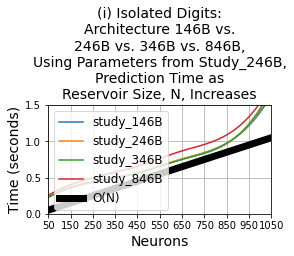

In [227]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo10TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo10TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo10TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.001*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12, loc=2)
plt.xlim([50,1050])
plt.ylim([0,1.5])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(i) Isolated Digits:\nArchitecture 146B vs.\n246B vs. 346B vs. 846B,\nUsing Parameters from Study_246B,\nPrediction Time as\nReservoir Size, N, Increases', fontsize=14)
plt.show()

In [79]:
np.random.seed(0)
# Parameters 
K = 85 
L = numClasses
N = 50                     #Text used 200
v = (np.random.uniform(-1,1, trainin.shape[0]))
sv = 0                     #From text
sfb = 0                   #No feedback required
dfb = 0
outAlg = 1 
isBias = True
isClassification = True
washout = 10

z = np.zeros((6,1))
inc = 200
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((6,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,2))  #Holds scores for multiple evaluations of single neuron size
plotInfo11= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((6,1))
n = np.zeros((6,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo11TimeTrain = pd.DataFrame()
plotInfo11TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_346B'].index[0]
while(count < 4): #Select models for evaluation
    #Select a model
    uConn = False
    yConn = False
    if count == 0:
        uConn = True
    elif count == 2:
        uConn = True
        yConn = True
    elif count == 3:
        yConn = True
    
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    B = studies.iloc[i,2].params['B']
    isU2Y = uConn
    isY2Y = yConn
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,6):#This is for increasing neurons for a particular model instantiation
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=testin, time=testin.shape[0], washout=washout)
            end = time.time()
            
            f1Score, aucScore, accuracyScore = getScores(testout, predicted)
            scores[k,0] = f1Score
            scores[k,1] = aucScore
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores[:,0])
        standard_deviation = np.std(scores[:,0])
        distance_from_mean = abs(scores[:,0] - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers_f1 = scores[not_outlier,0]
        no_outliers_auc = scores[not_outlier,1]
        no_outliers_time_train = timesTrain[not_outlier,0]
        no_outliers_time_predict = timesPredict[not_outlier,0]
        
        #average scores together
        f10 = np.mean(no_outliers_f1)
        auc0 = np.mean(no_outliers_auc)
        y[j,0] = f10
        z[j,0] = auc0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo11 = pd.concat((plotInfo11, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo11TimeTrain = pd.concat((plotInfo11TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo11TimePredict = pd.concat((plotInfo11TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

In [80]:
plotInfo11 = plotInfo11.rename(columns={"0": "study_146B", "1": "study_246B", "2": "study_346B", "3": "study_846B"})
plotInfo11TimeTrain = plotInfo11TimeTrain.rename(columns={"0": "study_146B", "1": "study_246B", "2": "study_346B", "3": "study_846B"})
plotInfo11TimePredict = plotInfo11TimePredict.rename(columns={"0": "study_146B", "1": "study_246B", "2": "study_346B", "3": "study_846B"})

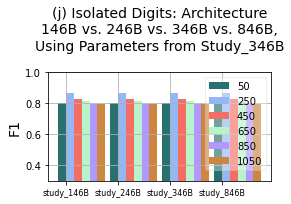

In [236]:
#add to plot
plt.figure(figsize=(4, 2))

N = plotInfo11.shape[1]

ind = np.arange(N)
width = 0.15
plt.bar(ind + width*0, plotInfo11.iloc[0,:], color = '#28716E', width = width, label='50')
plt.bar(ind + width*1, plotInfo11.iloc[1,:], color = '#94B8F5', width = width, label='250')
plt.bar(ind + width*2, plotInfo11.iloc[2,:], color = '#F56E63', width = width, label='450')
plt.bar(ind + width*3, plotInfo11.iloc[3,:], color = '#B8F3C9', width = width, label='650')
plt.bar(ind + width*4, plotInfo11.iloc[4,:], color = '#B098FF', width = width, label='850')
plt.bar(ind + width*5, plotInfo11.iloc[5,:], color = '#CD853F', width = width, label='1050')

plt.xticks(ind + width / 2, plotInfo11.columns, fontsize=8)
plt.legend(loc='best', fancybox=True, framealpha=0.35, fontsize=10)
plt.ylim([0.30,1.0])
plt.grid()
plt.ylabel('F1', fontsize=14)
plt.title('(j) Isolated Digits: Architecture\n146B vs. 246B vs. 346B vs. 846B,\nUsing Parameters from Study_346B\n', fontsize=14)
plt.show()

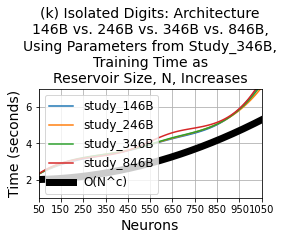

In [239]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo11TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo11TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo11TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.000003*np.power(n,2)+2
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12, loc=2)
plt.xlim([50,1050])
plt.ylim([1,7])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(k) Isolated Digits: Architecture\n146B vs. 246B vs. 346B vs. 846B,\nUsing Parameters from Study_346B,\nTraining Time as\nReservoir Size, N, Increases', fontsize=14)
plt.show()

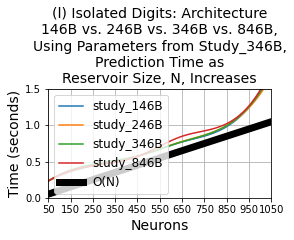

In [242]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo11TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo11TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo11TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.001*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(loc=2, fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,1.5])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(l) Isolated Digits: Architecture\n146B vs. 246B vs. 346B vs. 846B,\nUsing Parameters from Study_346B,\nPrediction Time as\nReservoir Size, N, Increases', fontsize=14)
plt.show()

In [84]:
np.random.seed(0)
# Parameters 
K = 85 
L = numClasses
N = 50                     #Text used 200
v = (np.random.uniform(-1,1, trainin.shape[0]))
sv = 0                     #From text
sfb = 0                   #No feedback required
dfb = 0
outAlg = 1 
isBias = True
isClassification = True
washout = 10

z = np.zeros((6,1))
inc = 200
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((6,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,2))  #Holds scores for multiple evaluations of single neuron size
plotInfo12= pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((6,1))
n = np.zeros((6,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo12TimeTrain = pd.DataFrame()
plotInfo12TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_846B'].index[0]
while(count < 4): #Select models for evaluation
    #Select a model
    uConn = False
    yConn = False
    if count == 0:
        uConn = True
    elif count == 2:
        uConn = True
        yConn = True
    elif count == 3:
        yConn = True
    
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    B = studies.iloc[i,2].params['B']
    isU2Y = uConn
    isY2Y = yConn
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,6):#This is for increasing neurons for a particular model instantiation
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=testin, time=testin.shape[0], washout=washout)
            end = time.time()
            
            f1Score, aucScore, accuracyScore = getScores(testout, predicted)
            scores[k,0] = f1Score
            scores[k,1] = aucScore
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores[:,0])
        standard_deviation = np.std(scores[:,0])
        distance_from_mean = abs(scores[:,0] - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers_f1 = scores[not_outlier,0]
        no_outliers_auc = scores[not_outlier,1]
        no_outliers_time_train = timesTrain[not_outlier,0]
        no_outliers_time_predict = timesPredict[not_outlier,0]
        
        #average scores together
        f10 = np.mean(no_outliers_f1)
        auc0 = np.mean(no_outliers_auc)
        y[j,0] = f10
        z[j,0] = auc0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo12 = pd.concat((plotInfo12, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo12TimeTrain = pd.concat((plotInfo12TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo12TimePredict = pd.concat((plotInfo12TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

In [85]:
plotInfo12 = plotInfo12.rename(columns={"0": "study_146B", "1": "study_246B", "2": "study_346B", "3": "study_846B"})
plotInfo12TimeTrain = plotInfo12TimeTrain.rename(columns={"0": "study_146B", "1": "study_246B", "2": "study_346B", "3": "study_846B"})
plotInfo12TimePredict = plotInfo12TimePredict.rename(columns={"0": "study_146B", "1": "study_246B", "2": "study_346B", "3": "study_846B"})

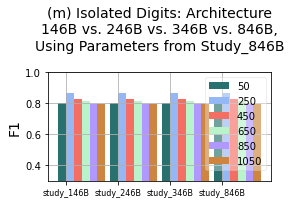

In [243]:
#add to plot
plt.figure(figsize=(4, 2))

N = plotInfo12.shape[1]

ind = np.arange(N)
width = 0.15
plt.bar(ind + width*0, plotInfo12.iloc[0,:], color = '#28716E', width = width, label='50')
plt.bar(ind + width*1, plotInfo12.iloc[1,:], color = '#94B8F5', width = width, label='250')
plt.bar(ind + width*2, plotInfo12.iloc[2,:], color = '#F56E63', width = width, label='450')
plt.bar(ind + width*3, plotInfo12.iloc[3,:], color = '#B8F3C9', width = width, label='650')
plt.bar(ind + width*4, plotInfo12.iloc[4,:], color = '#B098FF', width = width, label='850')
plt.bar(ind + width*5, plotInfo12.iloc[5,:], color = '#CD853F', width = width, label='1050')

plt.xticks(ind + width / 2, plotInfo12.columns, fontsize=8)
plt.legend(loc='best', fancybox=True, framealpha=0.35, fontsize=10)
plt.ylim([0.30,1.0])
plt.grid()
plt.ylabel('F1', fontsize=14)
plt.title('(m) Isolated Digits: Architecture\n146B vs. 246B vs. 346B vs. 846B,\nUsing Parameters from Study_846B\n', fontsize=14)
plt.show()

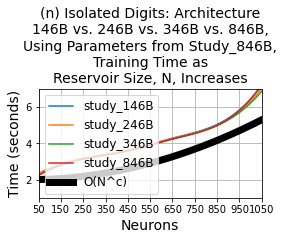

In [247]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo12TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo12TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo12TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.000003*np.power(n,2)+2
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(loc=2, fontsize=12)
plt.xlim([50,1050])
plt.ylim([1,7])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(n) Isolated Digits: Architecture\n146B vs. 246B vs. 346B vs. 846B,\nUsing Parameters from Study_846B,\nTraining Time as\nReservoir Size, N, Increases', fontsize=14)
plt.show()

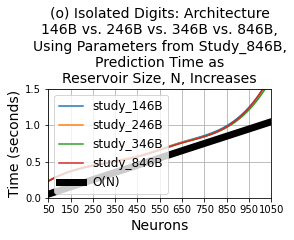

In [248]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo12TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo12TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo12TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.001*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(loc=2, fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,1.5])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(o) Isolated Digits: Architecture\n146B vs. 246B vs. 346B vs. 846B,\nUsing Parameters from Study_846B,\nPrediction Time as\nReservoir Size, N, Increases', fontsize=14)
plt.show()

# Which readout activation function is the best?

In [474]:
print(studies.loc[studies.iloc[:,0] == 'study_146B'].iloc[0,0])
studies.loc[studies.iloc[:,0] == 'study_146B'].iloc[0,2].params

study_146B


{'p': 0.7787086183169154,
 'a': 0.44265289145307124,
 'dw': 0.3942027192437702,
 'din': 0.5156115961398271,
 'sin': 1.991759910435517,
 'B': 0.00021100971883311072}

In [476]:
print(studies.loc[studies.iloc[:,0] == 'study_147B'].iloc[0,0])
studies.loc[studies.iloc[:,0] == 'study_147B'].iloc[0,2].params

study_147B


{'p': 0.5578372338487783,
 'a': 0.7208855790449711,
 'dw': 0.26382352551453403,
 'din': 0.5903948646972071,
 'sin': 0.23861097124304623,
 'B': 0.001017373730705545}

## Models that scored very similar, but used different activation function

In [89]:
np.random.seed(0)
# Parameters 
K = 85 
L = numClasses
N = 50                     #Text used 200
v = (np.random.uniform(-1,1, trainin.shape[0]))
sv = 0                     #From text
sfb = 0                   #No feedback required
dfb = 0
outAlg = 1 
isBias = True
isClassification = True
washout = 10

z = np.zeros((6,1))
inc = 200
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((6,1))       #Holds scores for different neuron sizes
w = np.zeros((6,1))
n = np.zeros((6,1))
scores = np.zeros((15,2))  #Holds scores for multiple evaluations of single neuron size
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo14 = pd.DataFrame()
plotInfo14TimeTrain = pd.DataFrame()
plotInfo14TimePredict = pd.DataFrame()
for c in range(0,2): #Select models for evaluation
    i = 0
    if c == 0:
        i = studies.loc[studies.iloc[:,0] == 'study_146B'].index[0]
    elif c == 1:
        i = studies.loc[studies.iloc[:,0] == 'study_147B'].index[0]
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,6):#This is for increasing neurons for a particular model instantiation
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                        L = L,
                        N = N,
                        p = p,
                        a = a,
                        v = v,
                        dw = dw,
                        din = din,
                        dfb = dfb,
                        sin = sin,
                        sfb = sfb,
                        sv = sv,
                        resFunc = resFunc,
                        outFunc = outFunc,
                        outAlg = outAlg,
                        B = B,
                        distribution = distribution,
                        isBias = isBias,
                        isU2Y = isU2Y,
                        isY2Y = isY2Y,
                        isClassification = isClassification)
            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=testin, time=testin.shape[0], washout=washout)
            end = time.time()
            
            f1Score, aucScore, accuracyScore = getScores(testout, predicted)
            scores[k,0] = f1Score
            scores[k,1] = aucScore
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores[:,0])
        standard_deviation = np.std(scores[:,0])
        distance_from_mean = abs(scores[:,0] - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers_f1 = scores[not_outlier,0]
        no_outliers_auc = scores[not_outlier,1]
        no_outliers_time_train = timesTrain[not_outlier,0]
        no_outliers_time_predict = timesPredict[not_outlier,0]
        
        #average scores together
        f10 = np.mean(no_outliers_f1)
        auc0 = np.mean(no_outliers_auc)
        y[j,0] = f10
        z[j,0] = auc0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo14 = pd.concat((plotInfo14, pd.DataFrame(y, columns=[studies.iloc[i,0]])), axis=1)
    plotInfo14TimeTrain = pd.concat((plotInfo14TimeTrain, pd.DataFrame(w, columns=[studies.iloc[i,0]])), axis=1)
    plotInfo14TimePredict = pd.concat((plotInfo14TimePredict, pd.DataFrame(n, columns=[studies.iloc[i,0]])), axis=1)

/Users/bweborg/Documents/Thesis/explore-esn/Digit/ESN.py:99: RuntimeWarning: divide by zero encountered in arctanh
  invFunc = lambda x: np.arctanh(x)
/Users/bweborg/Documents/Thesis/explore-esn/Digit/ESN.py:99: RuntimeWarning: divide by zero encountered in arctanh
  invFunc = lambda x: np.arctanh(x)
/Users/bweborg/Documents/Thesis/explore-esn/Digit/ESN.py:99: RuntimeWarning: divide by zero encountered in arctanh
  invFunc = lambda x: np.arctanh(x)
/Users/bweborg/Documents/Thesis/explore-esn/Digit/ESN.py:99: RuntimeWarning: divide by zero encountered in arctanh
  invFunc = lambda x: np.arctanh(x)
/Users/bweborg/Documents/Thesis/explore-esn/Digit/ESN.py:99: RuntimeWarning: divide by zero encountered in arctanh
  invFunc = lambda x: np.arctanh(x)
/Users/bweborg/Documents/Thesis/explore-esn/Digit/ESN.py:99: RuntimeWarning: divide by zero encountered in arctanh
  invFunc = lambda x: np.arctanh(x)
/Users/bweborg/Documents/Thesis/explore-esn/Digit/ESN.py:99: RuntimeWarning: divide by zero en

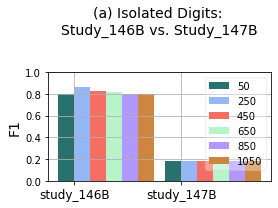

In [477]:
#add to plot
plt.figure(figsize=(4, 2))

N = plotInfo14.shape[1]

ind = np.arange(N)
width = 0.15
plt.bar(ind + width*0, plotInfo14.iloc[0,:], color = '#28716E', width = width, label='50')
plt.bar(ind + width*1, plotInfo14.iloc[1,:], color = '#94B8F5', width = width, label='250')
plt.bar(ind + width*2, plotInfo14.iloc[2,:], color = '#F56E63', width = width, label='450')
plt.bar(ind + width*3, plotInfo14.iloc[3,:], color = '#B8F3C9', width = width, label='650')
plt.bar(ind + width*4, plotInfo14.iloc[4,:], color = '#B098FF', width = width, label='850')
plt.bar(ind + width*5, plotInfo14.iloc[5,:], color = '#CD853F', width = width, label='1050')

plt.xticks(ind + width / 2, plotInfo14.columns, fontsize=12)
plt.legend(loc='best', fancybox=True, framealpha=0.35, fontsize=10)
plt.ylim([0.0,1.0])

plt.ylabel('F1', fontsize=14)
plt.title('(a) Isolated Digits: \nStudy_146B vs. Study_147B\n\n', fontsize=14)
plt.grid()
plt.show()

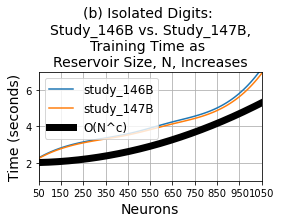

In [91]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo14TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo14TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo14TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.000003*np.power(n,2)+2
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([1,7])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(b) Isolated Digits: \nStudy_146B vs. Study_147B,\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

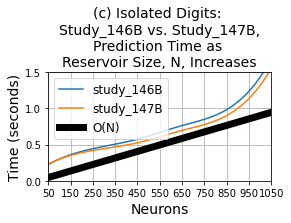

In [92]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo14TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo14TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo14TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0009*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,1.5])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(c) Isolated Digits: \nStudy_146B vs. Study_147B,\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

## Same exact model with different activation function

In [93]:
np.random.seed(0)
# Parameters 
K = 85 
L = numClasses
N = 50                     #Text used 200
v = (np.random.uniform(-1,1, trainin.shape[0]))
sv = 0                     #From text
sfb = 0                   #No feedback required
dfb = 0
outAlg = 1 
isBias = True
isClassification = True
washout = 10
z = np.zeros((6,1))

inc = 200
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((6,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,2))  #Holds scores for multiple evaluations of single neuron size
plotInfo15 = pd.DataFrame()
count = 0

#This is all for getting training and prediction times
w = np.zeros((6,1))
n = np.zeros((6,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo15TimeTrain = pd.DataFrame()
plotInfo15TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_146B'].index[0]
print('Parameters from ', str(studies.iloc[i,0]))
while(count < 2): #Select models for evaluation
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = count
    distribution = studies.iloc[i,2].user_attrs['distribution']

    for j in range(0,6):#This is for increasing neurons for a particular model instantiation
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                        L = L,
                        N = N,
                        p = p,
                        a = a,
                        v = v,
                        dw = dw,
                        din = din,
                        dfb = dfb,
                        sin = sin,
                        sfb = sfb,
                        sv = sv,
                        resFunc = resFunc,
                        outFunc = outFunc,
                        outAlg = outAlg,
                        B = B,
                        distribution = distribution,
                        isBias = isBias,
                        isU2Y = isU2Y,
                        isY2Y = isY2Y,
                        isClassification = isClassification)
            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=testin, time=testin.shape[0], washout=washout)
            end = time.time()
            
            f1Score, aucScore, accuracyScore = getScores(testout, predicted)
            scores[k,0] = f1Score
            scores[k,1] = aucScore
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores[:,0])
        standard_deviation = np.std(scores[:,0])
        distance_from_mean = abs(scores[:,0] - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers_f1 = scores[not_outlier,0]
        no_outliers_auc = scores[not_outlier,1]
        no_outliers_time_train = timesTrain[not_outlier,0]
        no_outliers_time_predict = timesPredict[not_outlier,0]
        
        #average scores together
        f10 = np.mean(no_outliers_f1)
        auc0 = np.mean(no_outliers_auc)
        y[j,0] = f10
        z[j,0] = auc0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo15 = pd.concat((plotInfo15, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo15TimeTrain = pd.concat((plotInfo15TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo15TimePredict = pd.concat((plotInfo15TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

Parameters from  study_146B


/Users/bweborg/Documents/Thesis/explore-esn/Digit/ESN.py:99: RuntimeWarning: divide by zero encountered in arctanh
  invFunc = lambda x: np.arctanh(x)
/Users/bweborg/Documents/Thesis/explore-esn/Digit/ESN.py:99: RuntimeWarning: divide by zero encountered in arctanh
  invFunc = lambda x: np.arctanh(x)
/Users/bweborg/Documents/Thesis/explore-esn/Digit/ESN.py:99: RuntimeWarning: divide by zero encountered in arctanh
  invFunc = lambda x: np.arctanh(x)
/Users/bweborg/Documents/Thesis/explore-esn/Digit/ESN.py:99: RuntimeWarning: divide by zero encountered in arctanh
  invFunc = lambda x: np.arctanh(x)
/Users/bweborg/Documents/Thesis/explore-esn/Digit/ESN.py:99: RuntimeWarning: divide by zero encountered in arctanh
  invFunc = lambda x: np.arctanh(x)
/Users/bweborg/Documents/Thesis/explore-esn/Digit/ESN.py:99: RuntimeWarning: divide by zero encountered in arctanh
  invFunc = lambda x: np.arctanh(x)
/Users/bweborg/Documents/Thesis/explore-esn/Digit/ESN.py:99: RuntimeWarning: divide by zero en

In [94]:
plotInfo15 = plotInfo15.rename(columns={"0": "study_146B", "1": "study_147B"})
plotInfo15TimeTrain = plotInfo15TimeTrain.rename(columns={"0": "study_146B", "1": "study_147B"})
plotInfo15TimePredict = plotInfo15TimePredict.rename(columns={"0": "study_146B", "1": "study_147B"})

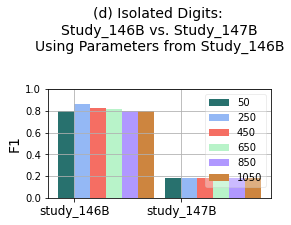

In [255]:
#add to plot
plt.figure(figsize=(4, 2))

N = plotInfo14.shape[1]

ind = np.arange(N)
width = 0.15
plt.bar(ind + width*0, plotInfo14.iloc[0,:], color = '#28716E', width = width, label='50')
plt.bar(ind + width*1, plotInfo14.iloc[1,:], color = '#94B8F5', width = width, label='250')
plt.bar(ind + width*2, plotInfo14.iloc[2,:], color = '#F56E63', width = width, label='450')
plt.bar(ind + width*3, plotInfo14.iloc[3,:], color = '#B8F3C9', width = width, label='650')
plt.bar(ind + width*4, plotInfo14.iloc[4,:], color = '#B098FF', width = width, label='850')
plt.bar(ind + width*5, plotInfo14.iloc[5,:], color = '#CD853F', width = width, label='1050')

plt.xticks(ind + width / 2, plotInfo14.columns,fontsize=12)
plt.legend(loc='best', fancybox=True, framealpha=0.35, fontsize=10)
plt.ylim([0.0,1.0])
plt.grid()
plt.ylabel('F1', fontsize=14)
plt.title('(d) Isolated Digits: \nStudy_146B vs. Study_147B\nUsing Parameters from Study_146B\n\n',fontsize=14)
plt.show()

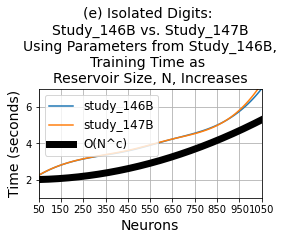

In [531]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo15TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo15TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo15TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.000003*np.power(n,2)+2
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([1,7])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(e) Isolated Digits: \nStudy_146B vs. Study_147B\nUsing Parameters from Study_146B,\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

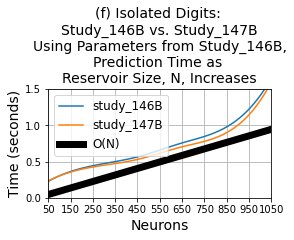

In [97]:
##### add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo15TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo15TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo15TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.0009*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,1.5])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(f) Isolated Digits: \nStudy_146B vs. Study_147B\nUsing Parameters from Study_146B,\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

In [98]:
np.random.seed(0)
# Parameters 
K = 85 
L = numClasses
N = 50                     #Text used 200
v = (np.random.uniform(-1,1, trainin.shape[0]))
sv = 0                     #From text
sfb = 0                   #No feedback required
dfb = 0
outAlg = 1 
isBias = True
isClassification = True
washout = 10
z = np.zeros((6,1))

inc = 200
x = np.arange(50,1051,inc) #Number of Neurons
y = np.zeros((6,1))       #Holds scores for different neuron sizes
scores = np.zeros((15,2))  #Holds scores for multiple evaluations of single neuron size
plotInfo16 = pd.DataFrame()
count = 0

w = np.zeros((6,1))
n = np.zeros((6,1))
timesTrain = np.zeros((15,1))
timesPredict = np.zeros((15,1))
plotInfo16TimeTrain = pd.DataFrame()
plotInfo16TimePredict = pd.DataFrame()

i = studies.loc[studies.iloc[:,0] == 'study_147B'].index[0]
print('Parameters from ', str(studies.iloc[i,0]))
while(count < 2): #Select models for evaluation
    N = 50
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = count
    distribution = studies.iloc[i,2].user_attrs['distribution']
    
    for j in range(0,6):#This is for increasing neurons for a particular model instantiation
        seed = 100
        for k in range(0,15):#This is for gathering multiple samples for an instatiation with N neurons
            model = esn(K = K,
                        L = L,
                        N = N,
                        p = p,
                        a = a,
                        v = v,
                        dw = dw,
                        din = din,
                        dfb = dfb,
                        sin = sin,
                        sfb = sfb,
                        sv = sv,
                        resFunc = resFunc,
                        outFunc = outFunc,
                        outAlg = outAlg,
                        B = B,
                        distribution = distribution,
                        isBias = isBias,
                        isU2Y = isU2Y,
                        isY2Y = isY2Y,
                        isClassification = isClassification)
            start = time.time() 
            model.generateW(seed)
            model.generateWin(seed)
            model.generateWfb(seed)

            model.train(input_u = trainin, teacher=trainout, washout=washout) #zero start state is default
            end = time.time()
            timesTrain[k,0] = end-start
            
            start = time.time() 
            predicted = model.run(input_u=testin, time=testin.shape[0], washout=washout)
            end = time.time()
            
            f1Score, aucScore, accuracyScore = getScores(testout, predicted)
            scores[k,0] = f1Score
            scores[k,1] = aucScore
            timesPredict[k,0] = end-start
            seed = seed + 1
            #print("Score received")
            del model
        #Remove outliers
        mean = np.mean(scores[:,0])
        standard_deviation = np.std(scores[:,0])
        distance_from_mean = abs(scores[:,0] - mean)
        max_deviations = 2
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers_f1 = scores[not_outlier,0]
        no_outliers_auc = scores[not_outlier,1]
        no_outliers_time_train = timesTrain[not_outlier,0]
        no_outliers_time_predict = timesPredict[not_outlier,0]
        
        #average scores together
        f10 = np.mean(no_outliers_f1)
        auc0 = np.mean(no_outliers_auc)
        y[j,0] = f10
        z[j,0] = auc0
        w[j,0] = np.mean(no_outliers_time_train)
        n[j,0] = np.mean(no_outliers_time_predict)
        
        #Increment N for next evaluation
        N = N + inc # We will build different size models in increments of 50 neurons
    plotInfo16 = pd.concat((plotInfo16, pd.DataFrame(y, columns=[str(count)])), axis=1)
    plotInfo16TimeTrain = pd.concat((plotInfo16TimeTrain, pd.DataFrame(w, columns=[str(count)])), axis=1)
    plotInfo16TimePredict = pd.concat((plotInfo16TimePredict, pd.DataFrame(n, columns=[str(count)])), axis=1)
    count = count + 1

Parameters from  study_147B


/Users/bweborg/Documents/Thesis/explore-esn/Digit/ESN.py:99: RuntimeWarning: divide by zero encountered in arctanh
  invFunc = lambda x: np.arctanh(x)
/Users/bweborg/Documents/Thesis/explore-esn/Digit/ESN.py:99: RuntimeWarning: divide by zero encountered in arctanh
  invFunc = lambda x: np.arctanh(x)
/Users/bweborg/Documents/Thesis/explore-esn/Digit/ESN.py:99: RuntimeWarning: divide by zero encountered in arctanh
  invFunc = lambda x: np.arctanh(x)
/Users/bweborg/Documents/Thesis/explore-esn/Digit/ESN.py:99: RuntimeWarning: divide by zero encountered in arctanh
  invFunc = lambda x: np.arctanh(x)
/Users/bweborg/Documents/Thesis/explore-esn/Digit/ESN.py:99: RuntimeWarning: divide by zero encountered in arctanh
  invFunc = lambda x: np.arctanh(x)
/Users/bweborg/Documents/Thesis/explore-esn/Digit/ESN.py:99: RuntimeWarning: divide by zero encountered in arctanh
  invFunc = lambda x: np.arctanh(x)
/Users/bweborg/Documents/Thesis/explore-esn/Digit/ESN.py:99: RuntimeWarning: divide by zero en

In [99]:
plotInfo16 = plotInfo16.rename(columns={"0": "study_146B", "1": "study_147B"})
plotInfo16TimeTrain = plotInfo16TimeTrain.rename(columns={"0": "study_146B", "1": "study_147B"})
plotInfo16TimePredict = plotInfo16TimePredict.rename(columns={"0": "study_146B", "1": "study_147B"})

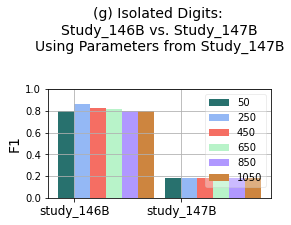

In [256]:
#add to plot
plt.figure(figsize=(4, 2))

N = plotInfo15.shape[1]

ind = np.arange(N)
width = 0.15
plt.bar(ind + width*0, plotInfo15.iloc[0,:], color = '#28716E', width = width, label='50')
plt.bar(ind + width*1, plotInfo15.iloc[1,:], color = '#94B8F5', width = width, label='250')
plt.bar(ind + width*2, plotInfo15.iloc[2,:], color = '#F56E63', width = width, label='450')
plt.bar(ind + width*3, plotInfo15.iloc[3,:], color = '#B8F3C9', width = width, label='650')
plt.bar(ind + width*4, plotInfo15.iloc[4,:], color = '#B098FF', width = width, label='850')
plt.bar(ind + width*5, plotInfo15.iloc[5,:], color = '#CD853F', width = width, label='1050')

plt.xticks(ind + width / 2, plotInfo15.columns, fontsize=12)
plt.legend(loc='best', fancybox=True, framealpha=0.35, fontsize=10)
plt.ylim([0.0,1.0])
plt.grid()
plt.ylabel('F1',fontsize=14)
plt.title('(g) Isolated Digits: \nStudy_146B vs. Study_147B\nUsing Parameters from Study_147B\n\n', fontsize=14)
plt.show()

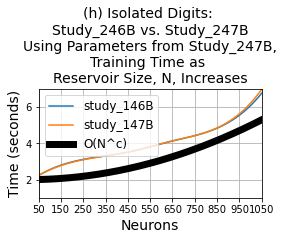

In [105]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo16TimeTrain.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo16TimeTrain.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo16TimeTrain.columns[col])
    
n = np.arange(1,1050)
exponential = 0.000003*np.power(n,2)+2
plt.plot(n,exponential,label='O(N^c)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([1,7])
plt.xlabel('Neurons', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('(h) Isolated Digits: \nStudy_146B vs. Study_147B\nUsing Parameters from Study_147B,\nTraining Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

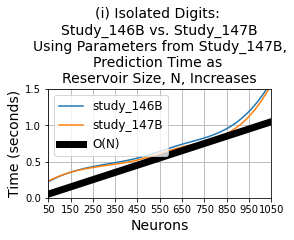

In [109]:
#add to plot
plt.figure(figsize=(4, 2))
for col in range(0,plotInfo16TimePredict.shape[1]):
    X_Y_Spline = make_interp_spline(x, plotInfo16TimePredict.iloc[:,col])
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = plotInfo16TimePredict.columns[col])
    
n = np.arange(1,1550)
orderOfN = (0.001*n)
plt.plot(n,orderOfN,label='O(N)', color='#000000', linewidth=7)

plt.legend(fontsize=12)
plt.xlim([50,1050])
plt.ylim([0,1.5])
plt.xlabel('Neurons', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.xticks(np.arange(50, 1050+1, 100))
plt.grid()
plt.title('(i) Isolated Digits: \nStudy_146B vs. Study_147B\nUsing Parameters from Study_147B,\nPrediction Time as \nReservoir Size, N, Increases', fontsize=14)
plt.show()

<ipython-input-277-2927a53de2e5>:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


KeyboardInterrupt: 

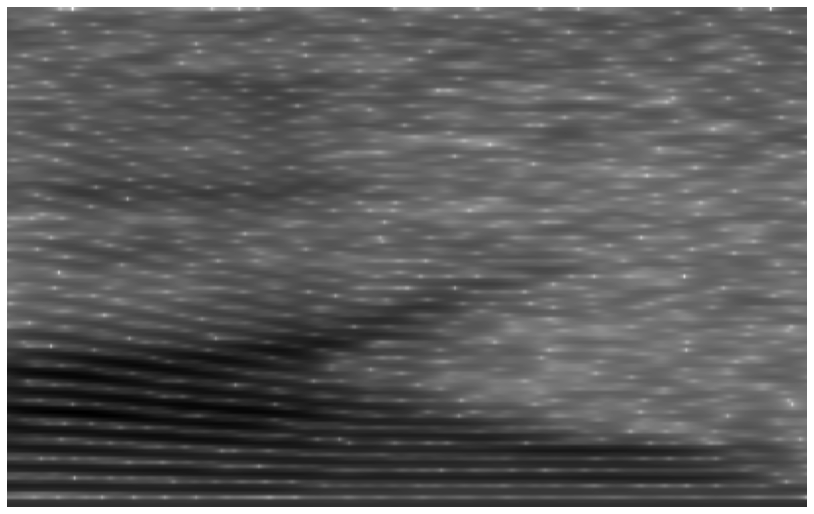

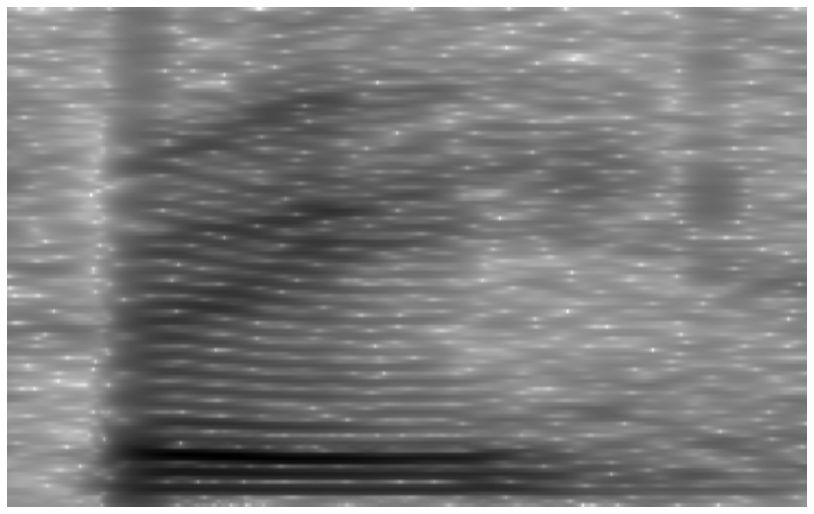

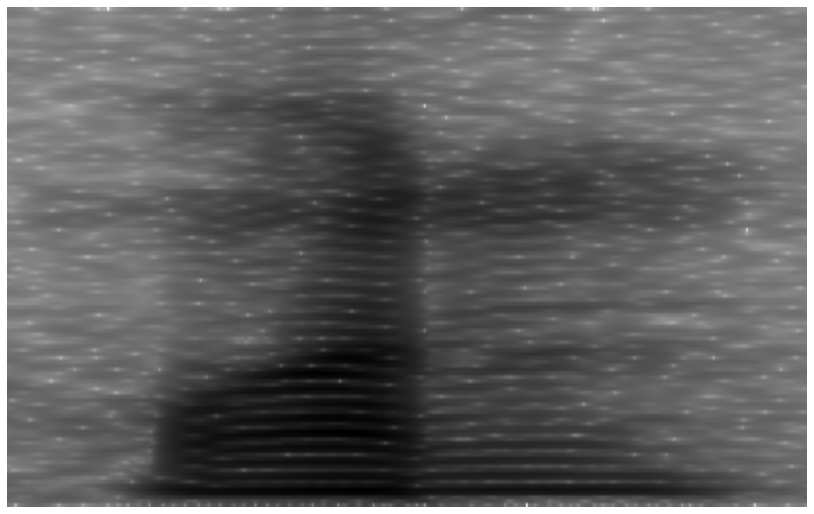

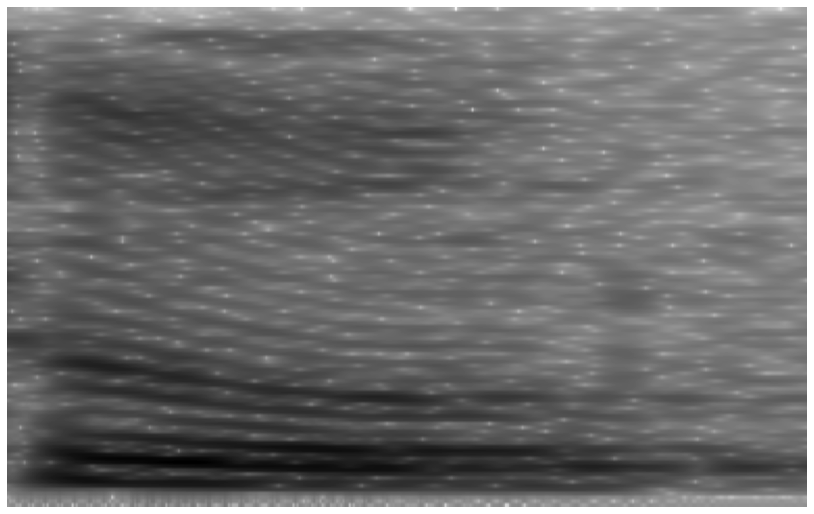

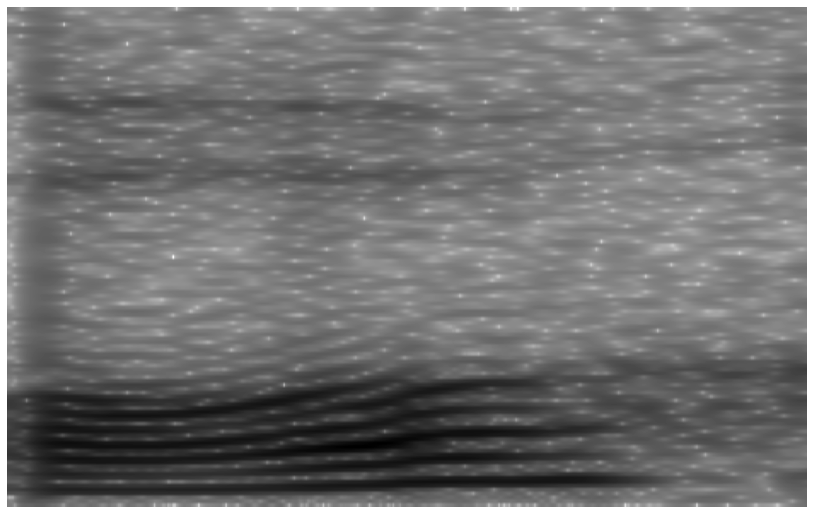

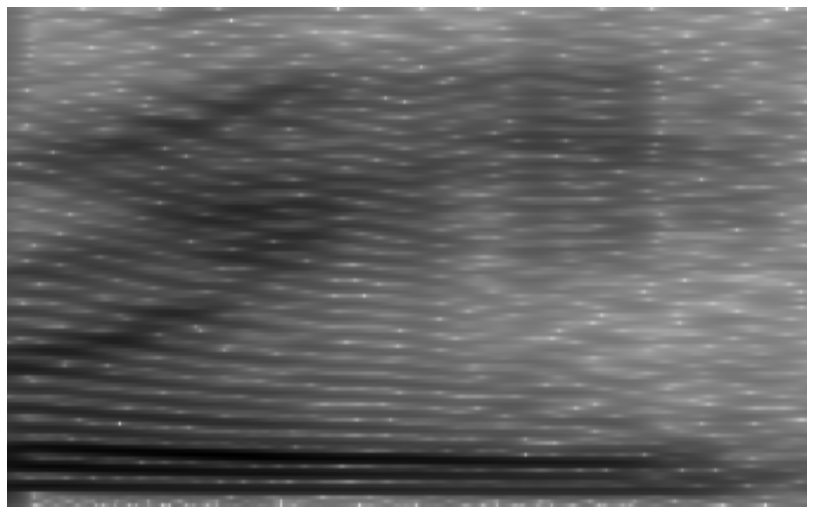

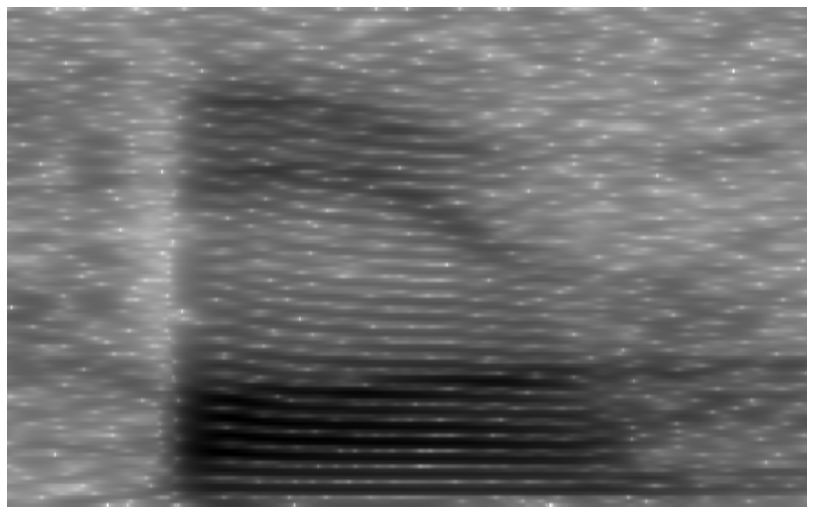

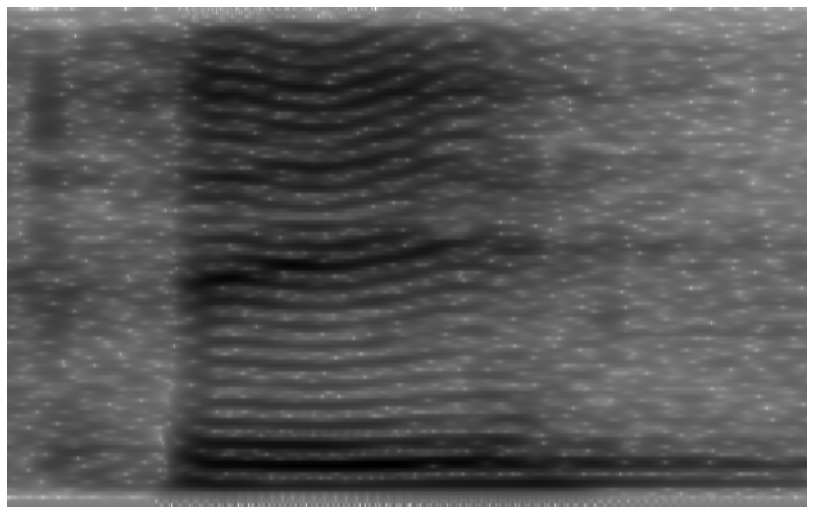

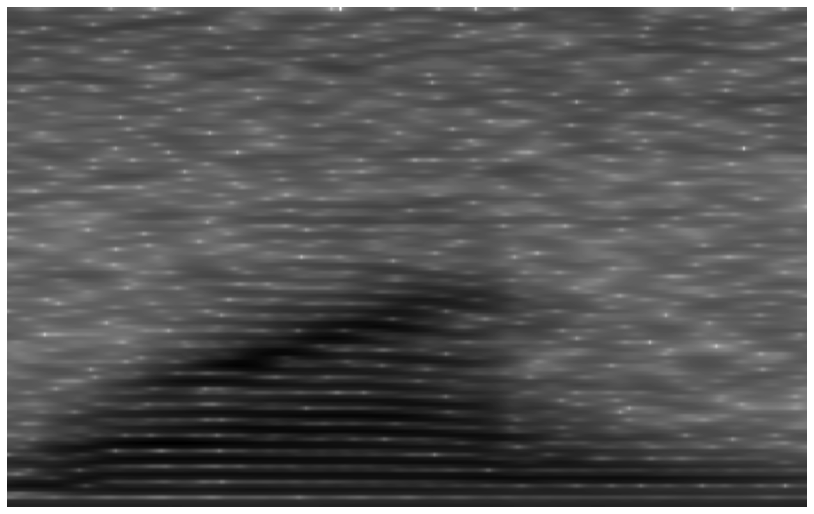

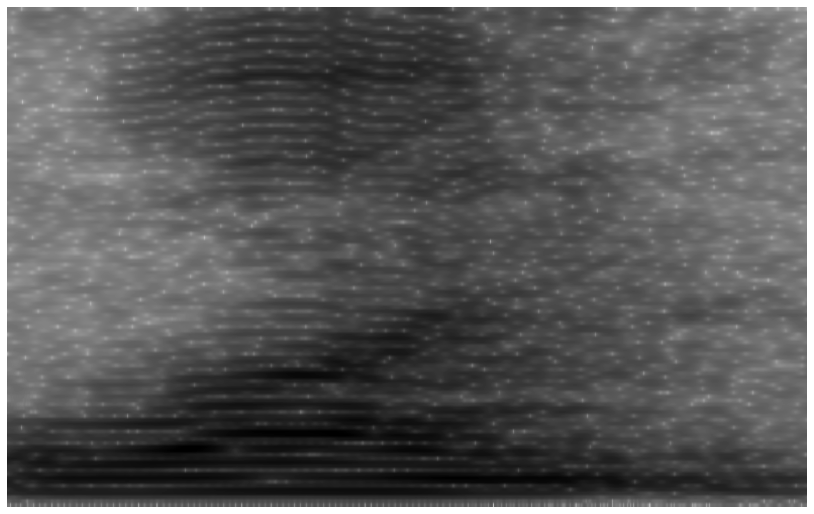

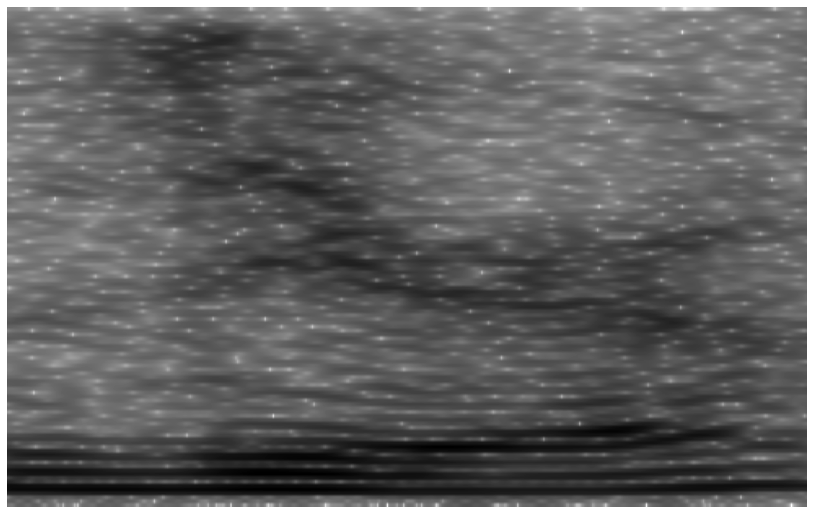

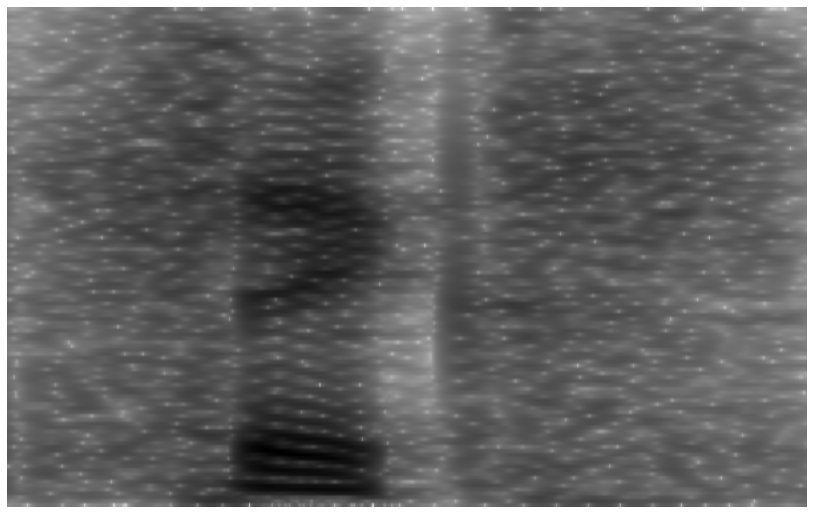

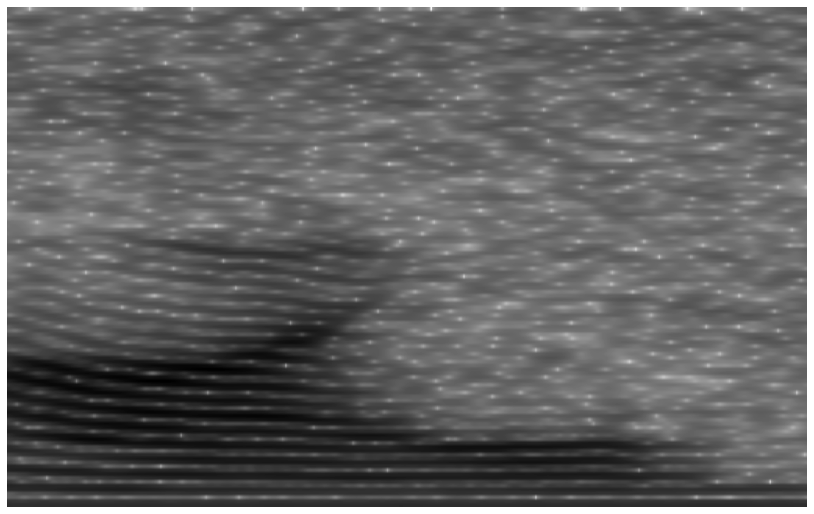

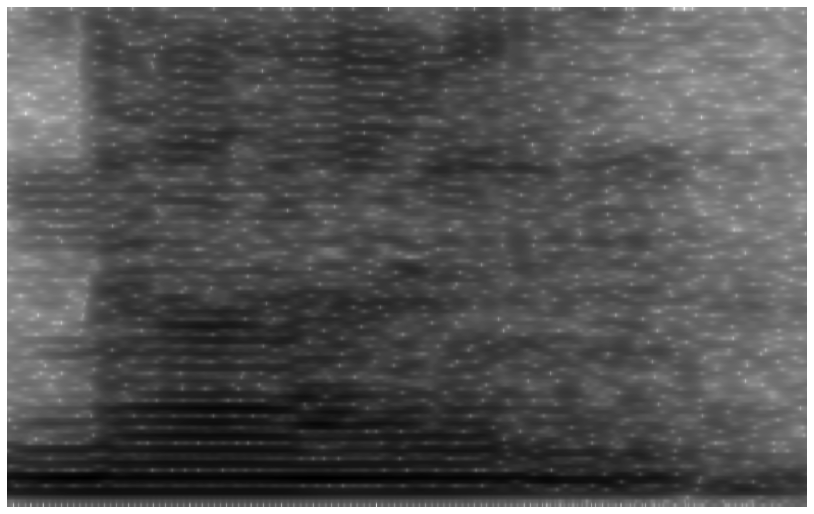

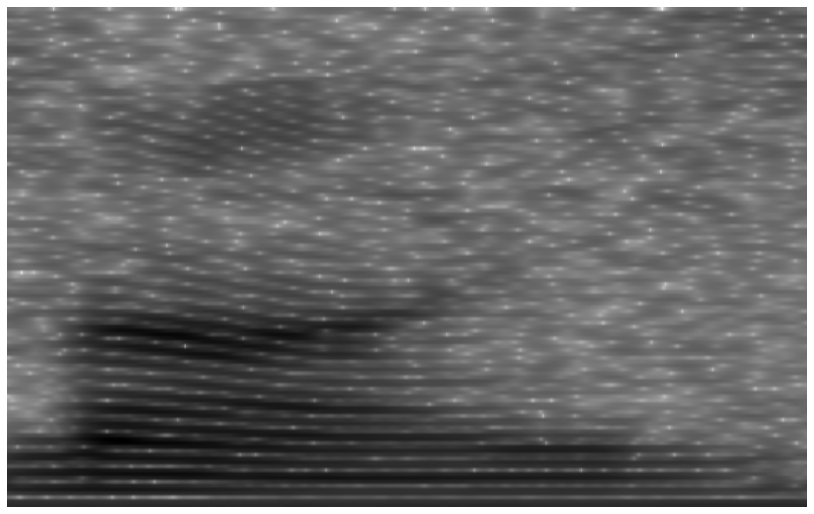

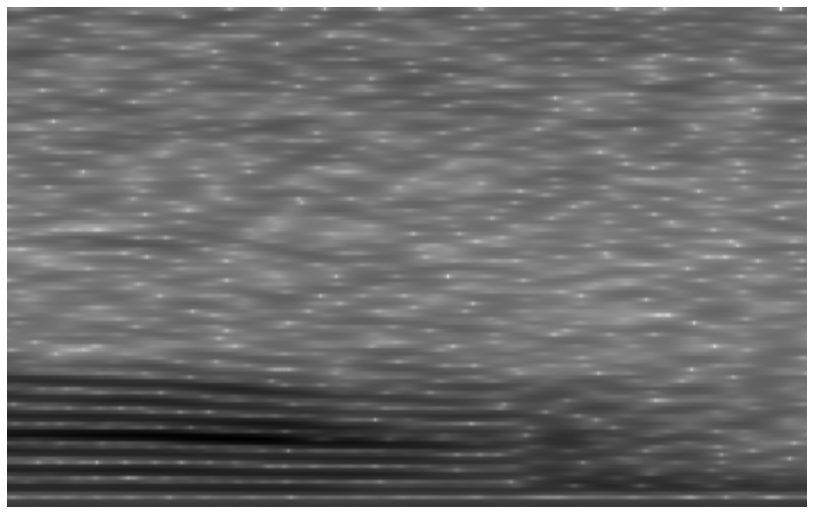

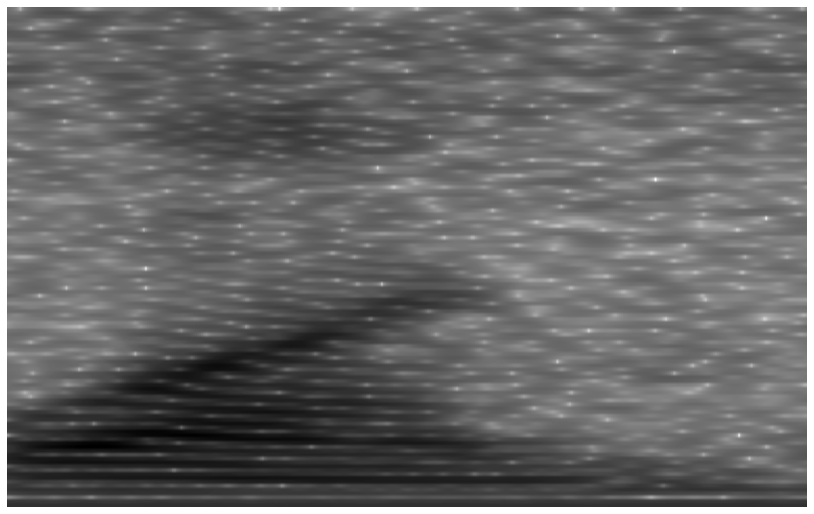

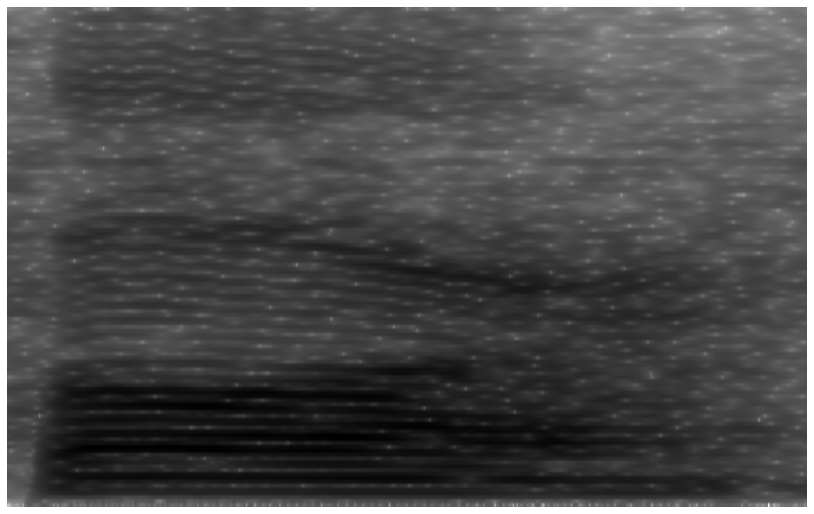

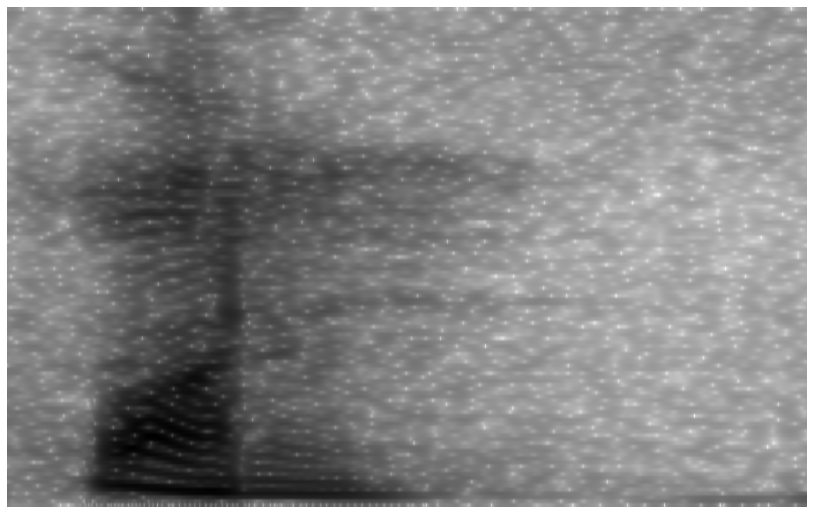

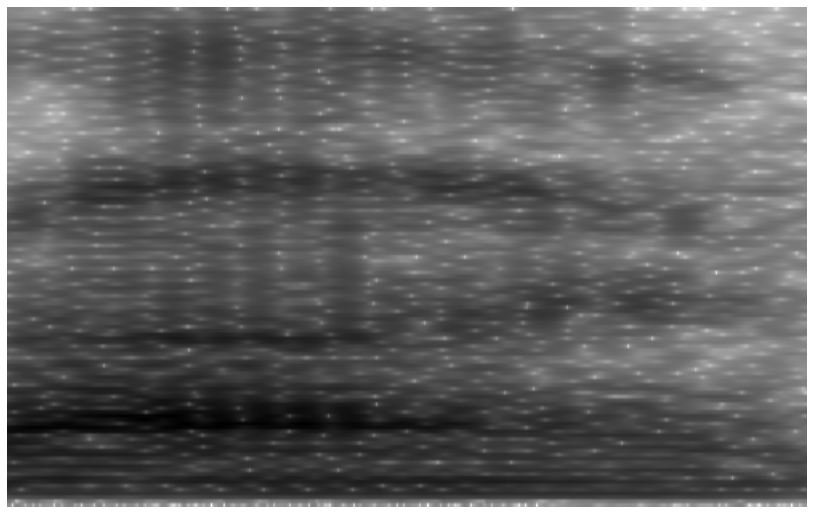

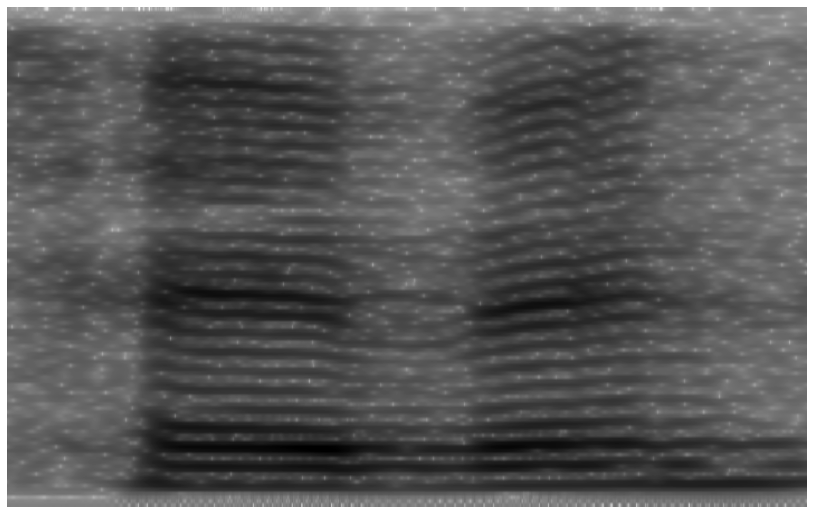

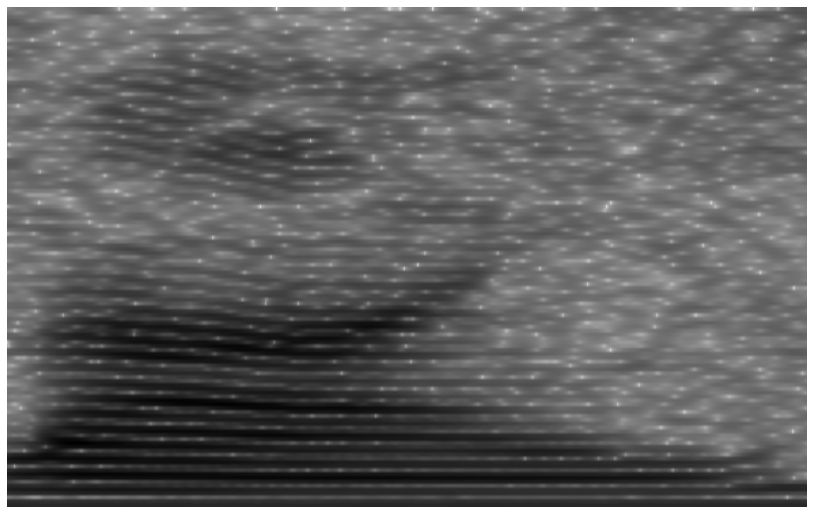

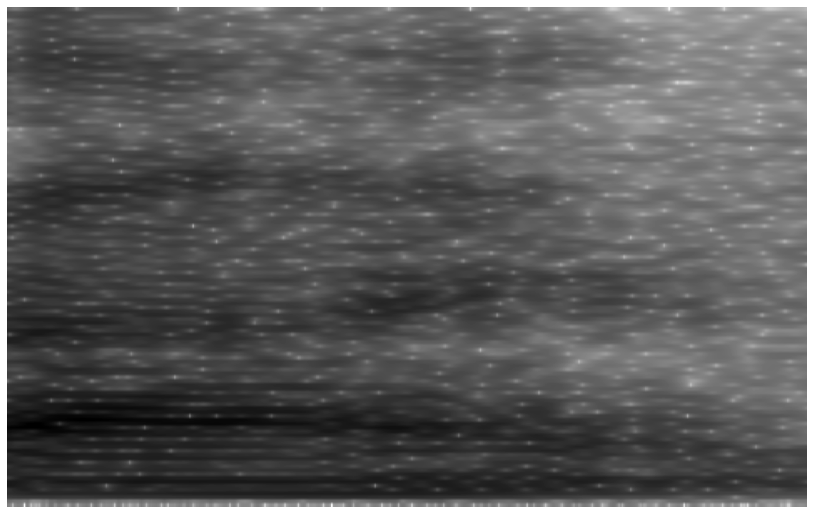

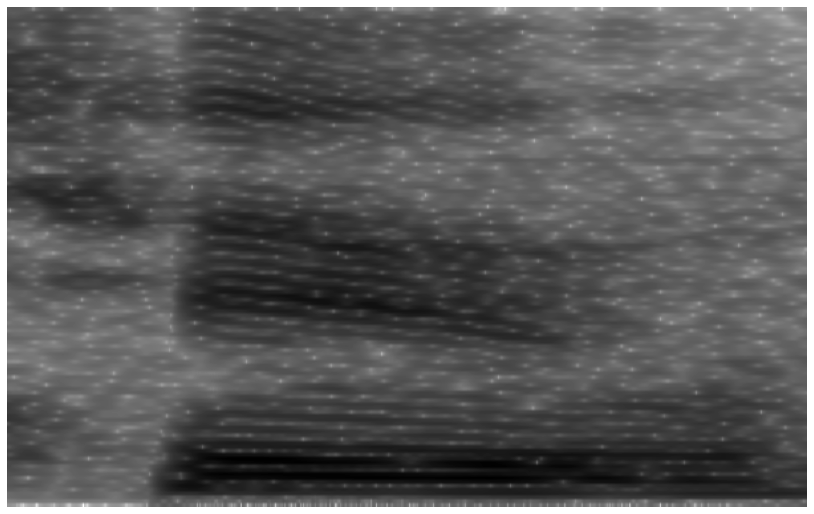

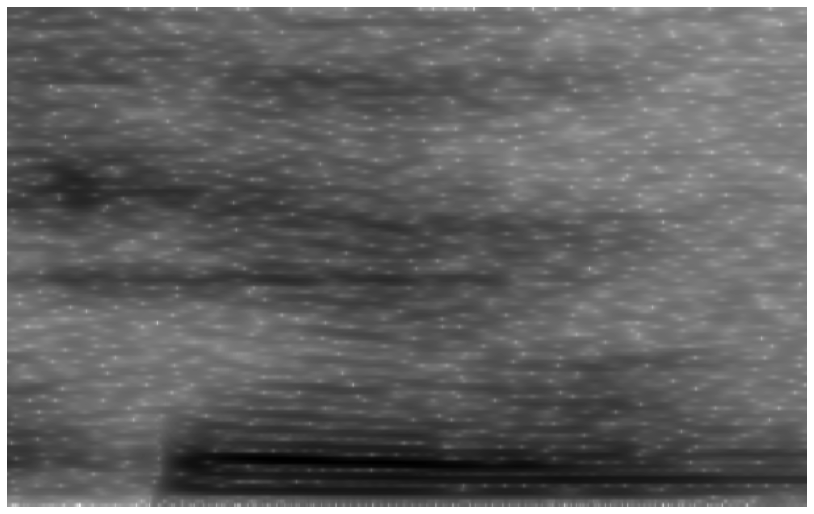

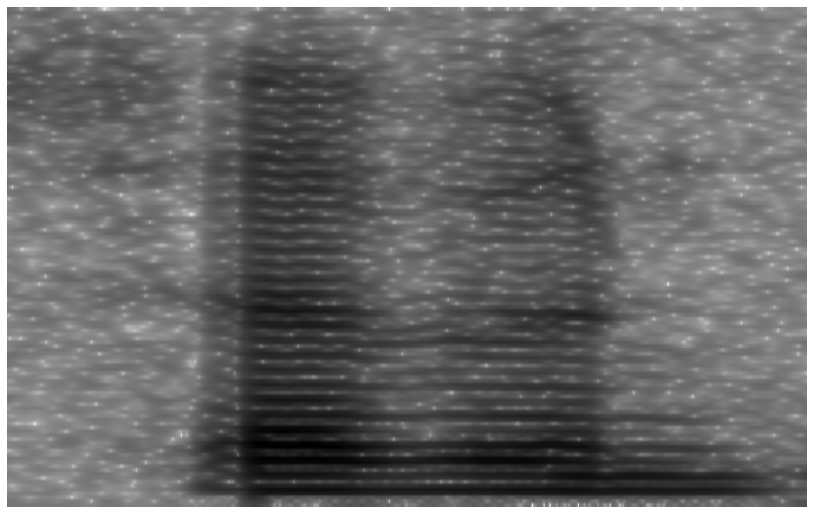

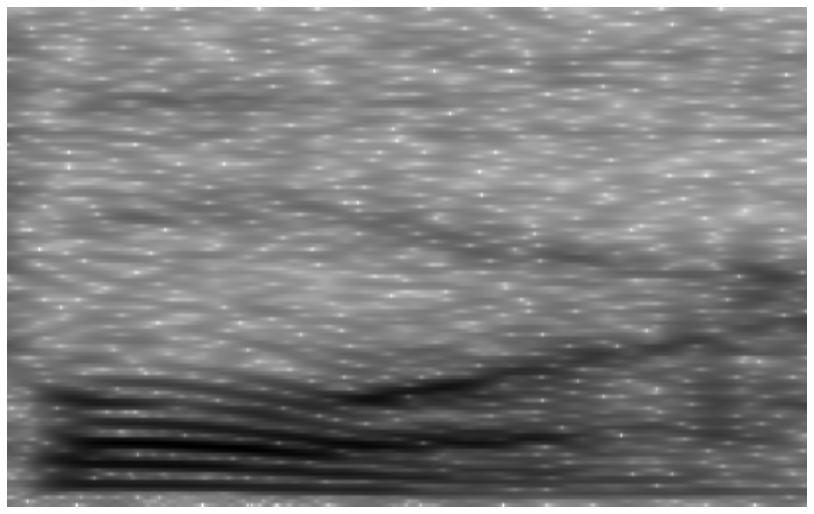

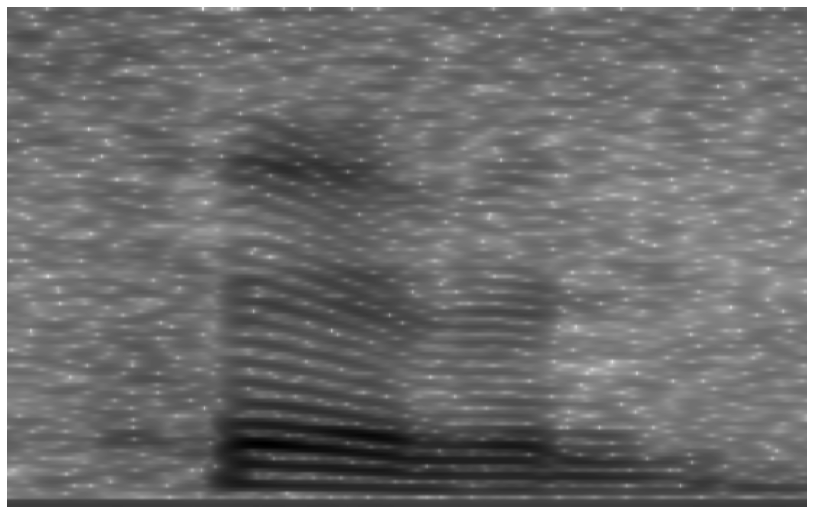

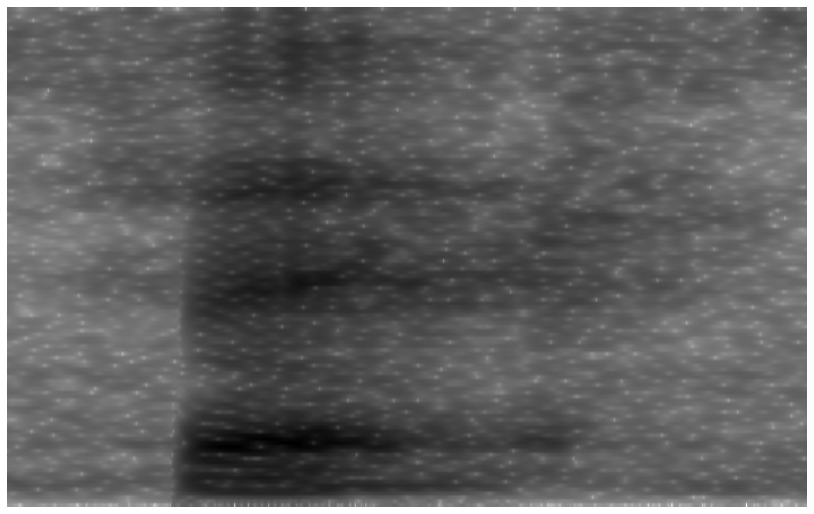

In [277]:
from __future__ import division, print_function
from os import listdir
from os.path import isfile, join

from matplotlib import pyplot as plt
from scipy.io import wavfile as wav

def wav_to_spectrogram(audio_path, save_path, spectrogram_dimensions=(64, 64), noverlap=250, cmap='gray_r'):
    """ Creates a spectrogram of a wav file.

    :param audio_path: path of wav file
    :param save_path:  path of spectrogram to save
    :param spectrogram_dimensions: number of pixels the spectrogram should be. Defaults (64,64)
    :param noverlap: See http://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html
    :param cmap: the color scheme to use for the spectrogram. Defaults to 'gray_r'
    :return:
    """

    sample_rate, samples = wav.read(audio_path)

    fig = plt.figure()
    fig.set_size_inches((spectrogram_dimensions[0]/fig.get_dpi(), spectrogram_dimensions[1]/fig.get_dpi()))
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    ax.specgram(samples, cmap=cmap, Fs=2, noverlap=noverlap)
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())
    fig.savefig(save_path, bbox_inches="tight", pad_inches=0)


def dir_to_spectrogram(audio_dir, spectrogram_dir, spectrogram_dimensions=(800, 500), noverlap=250, cmap='gray_r'):
    """ Creates spectrograms of all the audio files in a dir

    :param audio_dir: path of directory with audio files
    :param spectrogram_dir: path to save spectrograms
    :param spectrogram_dimensions: tuple specifying the dimensions in pixes of the created spectrogram. default:(64,64)
    :param noverlap: See http://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html
    :param cmap: the color scheme to use for the spectrogram. Defaults to 'gray_r'
    :return:
    """
    file_names = [f for f in listdir(audio_dir) if isfile(join(audio_dir, f)) and '.wav' in f]

    for file_name in file_names:
        #print(file_name)
        audio_path = audio_dir + file_name
        spectogram_path = spectrogram_dir + file_name.replace('.wav', '.png')
        wav_to_spectrogram(audio_path, spectogram_path, spectrogram_dimensions=spectrogram_dimensions, noverlap=noverlap, cmap=cmap)


if __name__ == '__main__':
    audio_dir = "/Users/bweborg/Documents/Thesis/explore-esn/Digit/recordings/"
    spectrogram_dir = "/Users/bweborg/Documents/Thesis/explore-esn/Digit/spectrogram"
    dir_to_spectrogram(audio_dir, spectrogram_dir)
